## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

В данном разделе представленны базовые статистики датасета по следующим параметрам
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

_____________________________________________________________________


In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from operator import itemgetter
from collections import OrderedDict

#Loading all datasets
courses = pd.read_csv('courses.csv', index_col = 0)
courses.rename(columns = {'id' : 'course_id', 'title' : 'course_title', 'field' :'course_field'}, inplace = True)
students = pd.read_csv('students.csv')
students.rename(columns = {'id' : 'student_id'}, inplace = True)
students1 = pd.read_csv('students.csv')
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progresses.rename(columns = {'id' : 'progress_id'}, inplace = True)
progress_phases = pd.read_csv('progress_phases.csv')

#Merging datasets into one main dataset
progress_df = pd.merge(progress_phases, progresses, how = 'inner', on = 'progress_id')
courses_df = pd.merge(courses, course_contents, how = 'inner', on = 'course_id')
data = pd.merge(progress_df, courses_df, how = 'left', on = ['module_number', 'lesson_number', 'course_id'])

In [3]:
#Counting number of courses in dataset
data['course_title'].nunique()

15

In [4]:
#Counting number of modules in each course
number_of_modules = data[['module_number', 'course_title']].groupby(['course_title']).module_number.nunique()
number_of_modules

course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

In [5]:
#Counting number of lessons in each module in each course
number_of_lessons = data[['module_title', 'course_title', 'lesson_title']].groupby(['course_title', 'module_title']).lesson_title.nunique()
number_of_lessons

course_title                   module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

In [6]:
#Counting median number of lessons in each course
median_of_lessons = number_of_lessons.groupby(['course_title']).median()
median_of_lessons 


course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

In [7]:
#Counting number of students in each course
data[['course_title', 'student_id']].groupby(['course_title']).student_id.nunique()

course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

In [8]:
#Dropping NaN data and fake age data
students['birthday'] = pd.to_datetime(students['birthday'], errors = 'coerce')
students['age'] = (pd.Timestamp.now() - students['birthday']).astype('timedelta64[Y]')
students = students.dropna()
students = students.loc[(students['age'] > 11) & (students['age'] < 80)]

#Counting maximum, minimum, mean and median age of students
print('Maximum age of a student: ' + str(round(students['age'].max())) + ' years')
print('Minimum age of a student: ' + str(round(students['age'].min())) + ' years')
print('Mean age of a student: ' + str(round(students['age'].mean())) + ' years')
print('Median age of a student: ' + str(round(students['age'].median())) + ' years')

Maximum age of a student: 76 years
Minimum age of a student: 12 years
Mean age of a student: 30 years
Median age of a student: 29 years


In [9]:
#Adding course data from main dataset
course_students_ages = students.merge(data, how = 'inner', on = 'student_id')[['age','course_title']]

#Counting maximum, minimum, mean and median age of students for each course 
course_students_ages = course_students_ages.groupby('course_title').agg(['max', 'min', 'mean', 'median'])
course_students_ages

age                        
                                      max   min       mean median
course_title                                                     
Excel Базовый                        61.0  17.0  33.654593   34.0
Java-разработчик                     65.0  15.0  30.221888   29.0
Java-разработчик c нуля              55.0  15.0  29.977139   29.0
JavaScript с нуля                    59.0  14.0  28.814078   28.0
PHP-разработчик с 0 до PRO. Часть 1  75.0  14.0  31.364486   30.0
SMM-маркетолог от А до Я             52.0  18.0  29.194879   28.0
UX-дизайн                            58.0  15.0  30.676797   30.0
Анимация интерфейсов                 51.0  15.0  30.256162   30.0
Веб-вёрстка для начинающих 2.0       59.0  14.0  28.954231   28.0
Веб-дизайн PRO 2.0                   59.0  15.0  28.939949   28.0
Веб-дизайн Базовый                   51.0  16.0  28.935138   28.0
Веб-дизайн с нуля 2.0                76.0  15.0  28.727566   28.0
Веб-разработчик                      51.0  14.0  27.895758   27.0
Интернет-маркетолог от Ingate        58.0  17.0  31.908196   31.0
Руководитель digital-проектов        48.0  21.0  32.487246   32.0

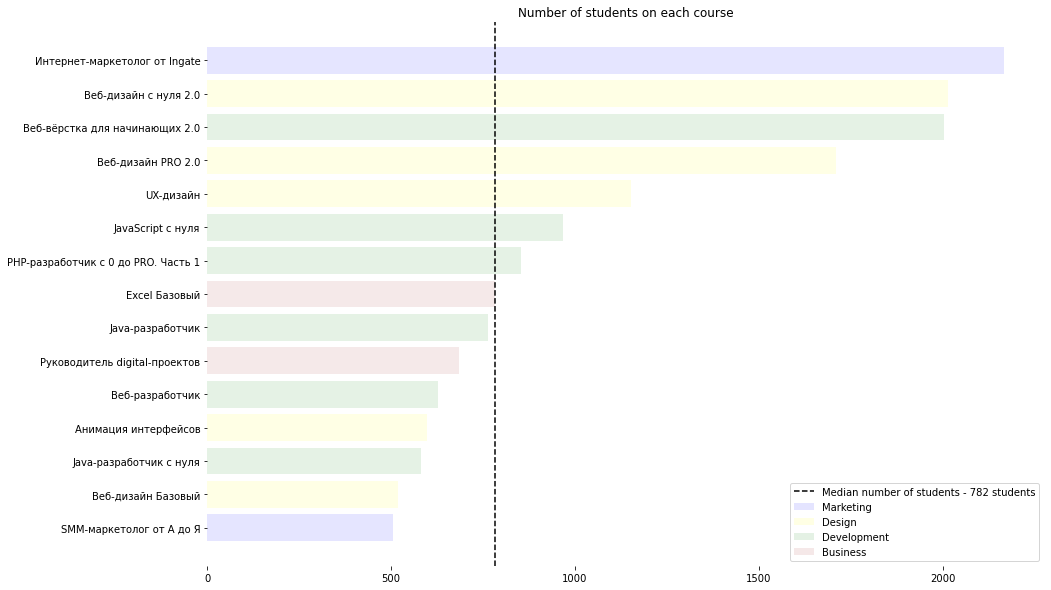

In [11]:
#Plotting bar showing number of students on each course (detailed one)

#Sorting data for bar chart
values_list_sorted = []
for name, dataset in data.groupby(['course_title']):
    number = dataset.groupby(['student_id'])['student_id'].unique().count()
    field = dataset['course_field'].unique()
    values_list_sorted.append([name, number, field])
values_list_sorted.sort(key = itemgetter(1))

#Plotting bar chart
plt.figure(figsize=(15, 10))
i = 0
x = list(range(15))
for pair in values_list_sorted:
    label = pair[2][0]
    colors = {'Marketing':'blue', 'Design':'yellow', 'Development':'green', 'Business':'brown'}
    color = colors.get(label)
    plt.barh(x[i], pair[1], label = label, color = color, alpha=0.1)
    i += 1

#Making median line
median_value_students = np.median(np.array(values_list_sorted).flatten()[1::3])
plt.axvline(x = median_value_students, ls = '--', color = 'black',
            label = 'Median number of students - {} students'.format(median_value_students))

#Adding details for bar chart
plt.yticks(x, np.array(values_list_sorted).flatten()[::3])
plt.title('Number of students on each course')

#Making legend for plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.box(on=None)
plt.show()

## Анализ графика
По данным графика самыми популярными курсами среди сутдентов являются следующие курсы:
* Интернет маркетолог от Ingate
* Веб дизайн с нуля 2.0
* Веб верстка для начинающих 2.0
* Веб дизайн PRO 2.0

Наименее популярные курсы:
* SMM-маркетолок
* Java-разработчик с нуля
* Веб-дизайн базовый

Сфера *бизнесс* предлагает всего два курса с количеством студентов ниже медианного, что позволяет сказать о том, что эта сфера самая непопулярная.

Веб-верстка для начинающих является самым популярным курсом из сферы *разработки*, а остальные курсы из этой сферы находятся в районе медианных значений.

Самая популярная сфера - *Дизайн*. Большая часть студентов обучается в этой сфере. Причем больше половины курсов проходит высокое число студентов.

Сфера маркетинга включает самое популярное направление и наименее популярное направление.



## 2. Расчет потенциальной нагрузки на преподавателей

В данном разделе представлен расчет  прироста студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно), а также количество прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.



In [12]:
data.sort_values(['start_date'])
#Creating course's list
course_list = list(course_students_ages.index)
#Dropping positions without homework
data[['start_date', 'finish_date']] = data[['start_date', 'finish_date']].apply(pd.to_datetime)
data['month'] = data.start_date.dt.to_period('M')
data1 = data.loc[(data['is_homework'] == True)]
#First module with homework in each course
list_of_first_modules = list(data1.groupby(['course_title']).module_number.min())
#print(data1.groupby(['course_title']).module_number.min())
#Grouping data by date and course title
sum_of_month = data1[['course_title','month', 'student_id','module_number']].groupby(['course_title','month',
                                                                                      'module_number']).nunique()
sum_of_month = sum_of_month.drop(['module_number'], axis = 'columns')
sum_unstacked = sum_of_month.unstack(level = 2).student_id
sum_unstacked.fillna(0.0, inplace = True)
sum_unstacked[1]

C:\Users\like7\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


course_title                   month  
Excel Базовый                  2018-02     6.0
                               2018-03     3.0
                               2018-04     0.0
                               2018-05     3.0
                               2018-06     9.0
                                          ... 
Руководитель digital-проектов  2019-03    36.0
                               2019-04    17.0
                               2019-05    25.0
                               2019-06    15.0
                               2019-07    20.0
Name: 1, Length: 251, dtype: float64

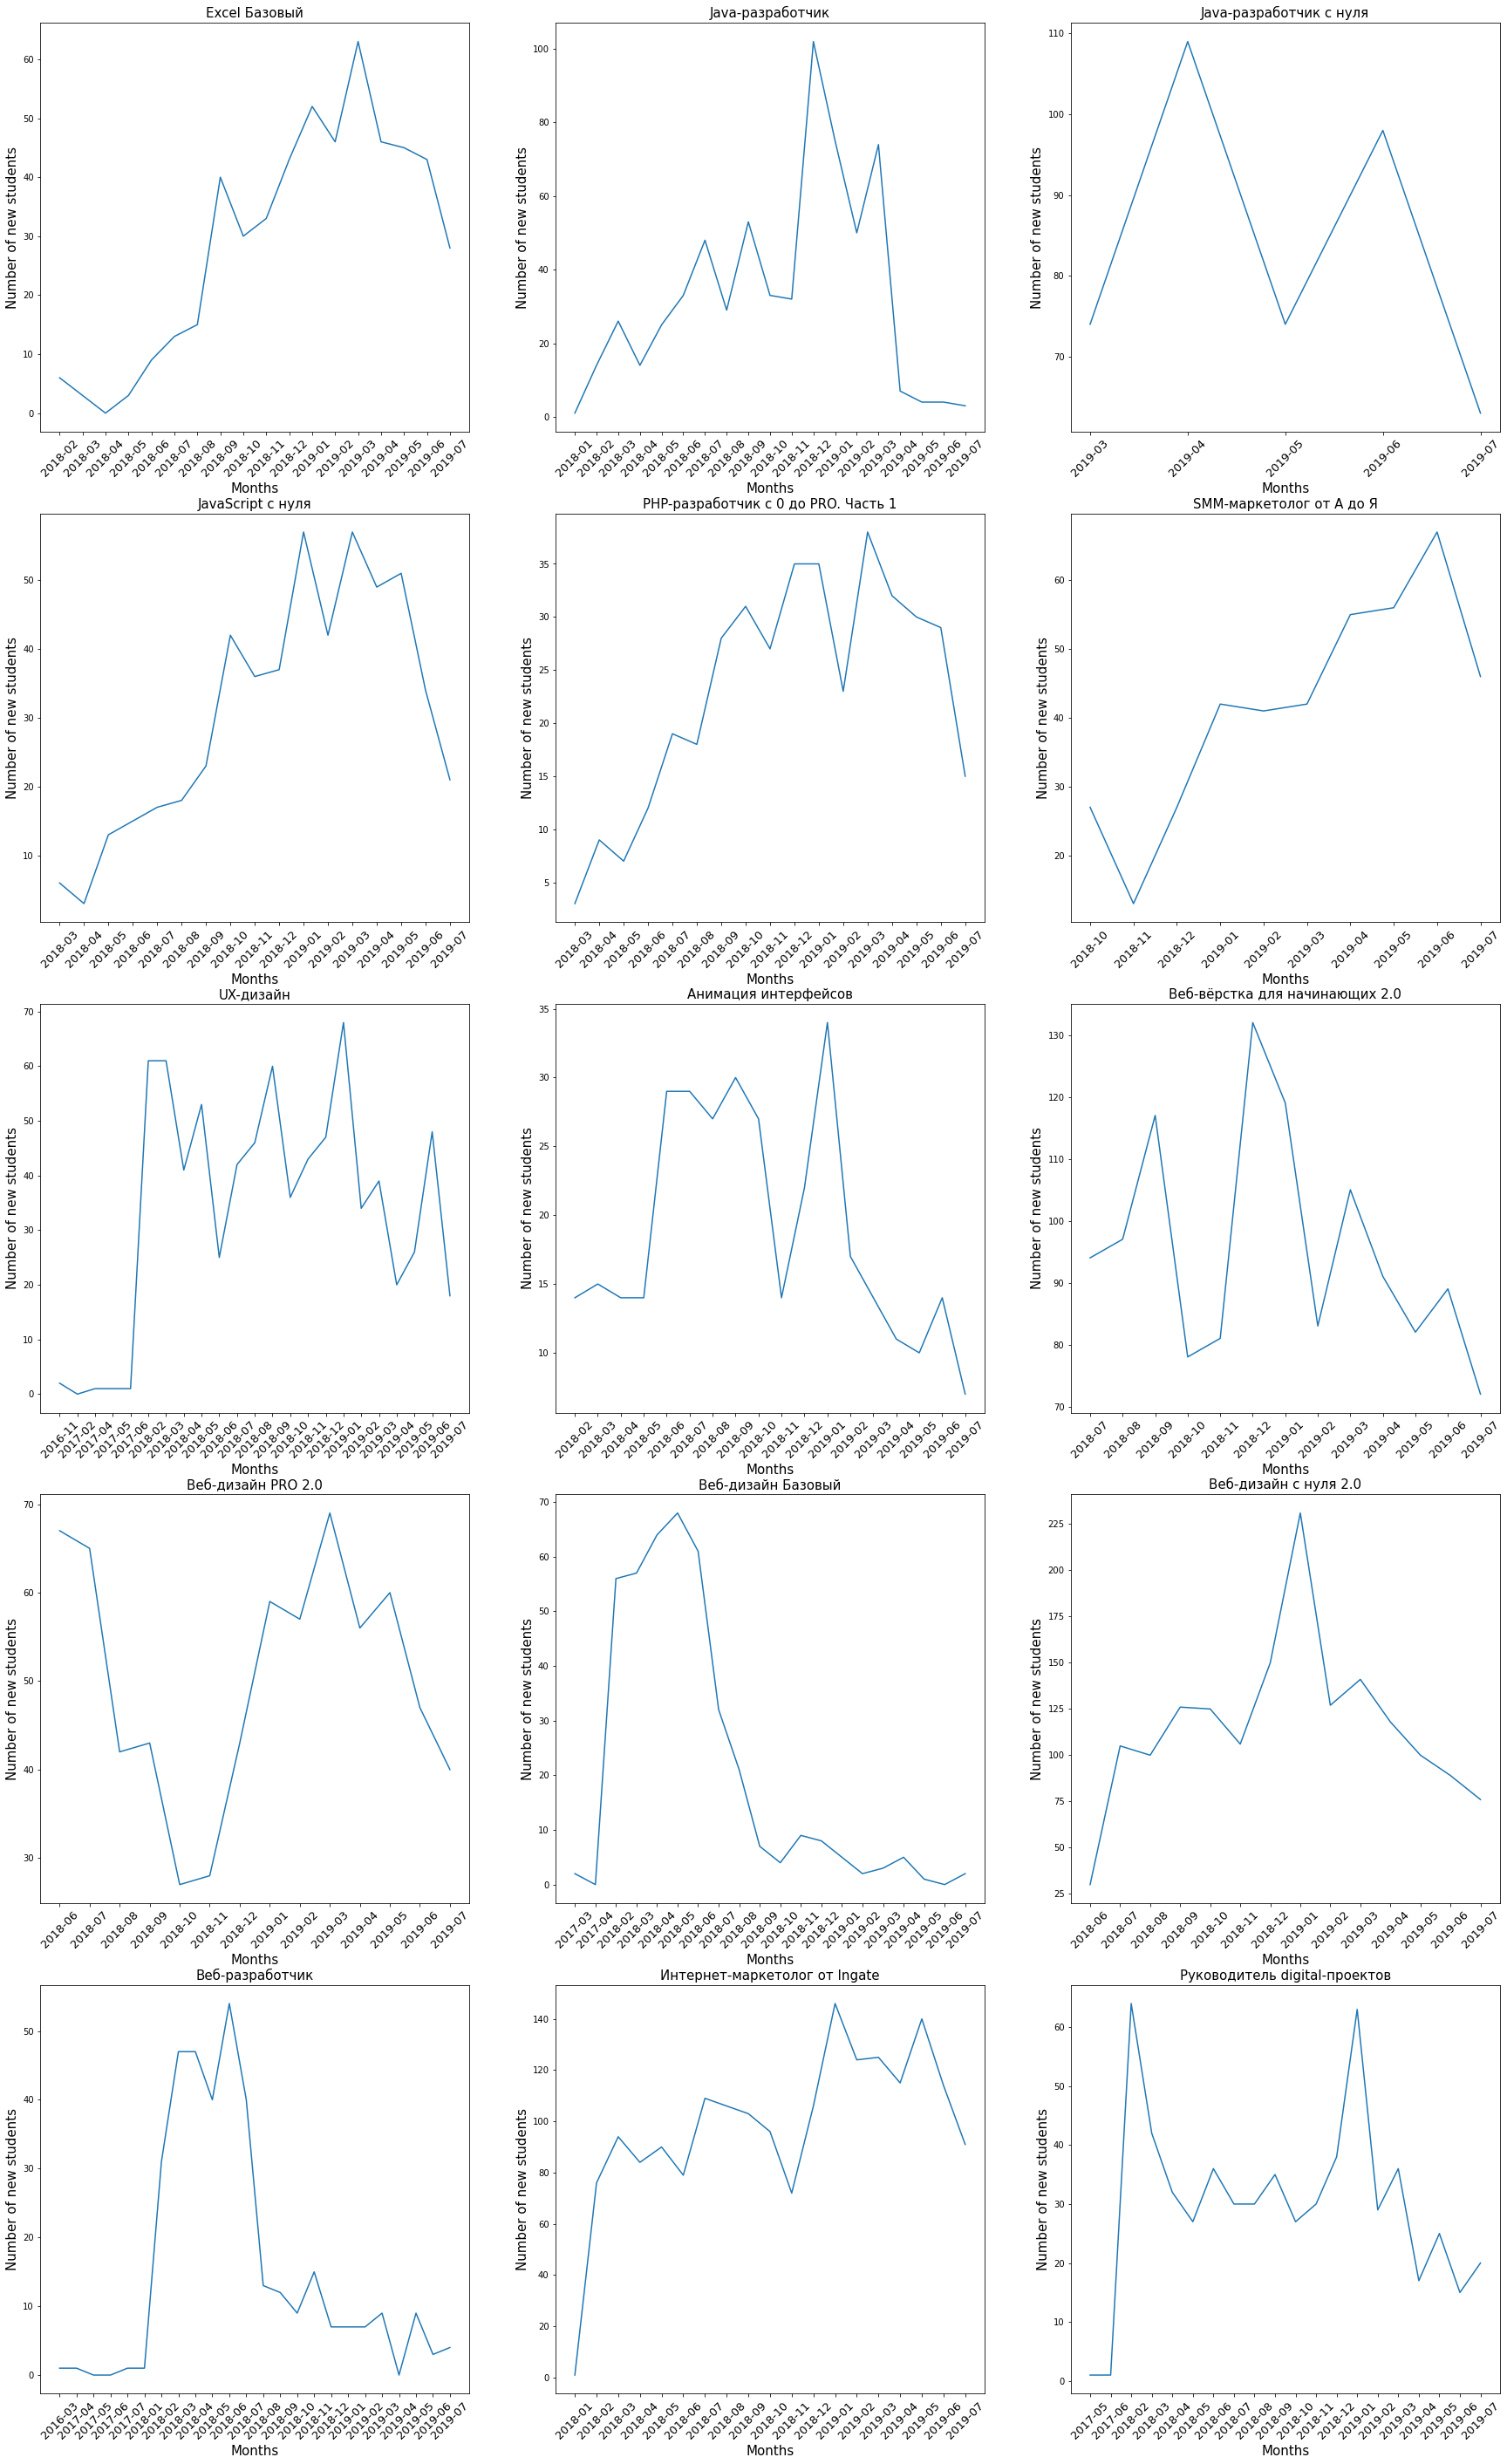

In [13]:
# 15 line-graphs showing growth of students for each course
fig, axes = plt.subplots(5, 3, figsize=(30,50))
i = 0
for row in range(5):
    for column in range(3):
        axes[row, column].plot(list(range(sum_unstacked[list_of_first_modules[i]].loc[course_list[i]].index.nunique())),
                               sum_unstacked[list_of_first_modules[i]].loc[course_list[i]])
        axes[row, column].set_title(course_list[i], fontsize = 15)
        axes[row, column].set_xlabel('Months', fontsize = 15)
        axes[row, column].set_ylabel('Number of new students', fontsize = 15)
        axes[row, column].set_xticks(list(range(sum_unstacked[list_of_first_modules[i]].loc[course_list[i]].index.nunique())))
        axes[row, column].set_xticklabels(sum_unstacked[list_of_first_modules[i]].loc[course_list[i]].index, rotation = 45, fontsize = 13)
        i += 1
plt.show()

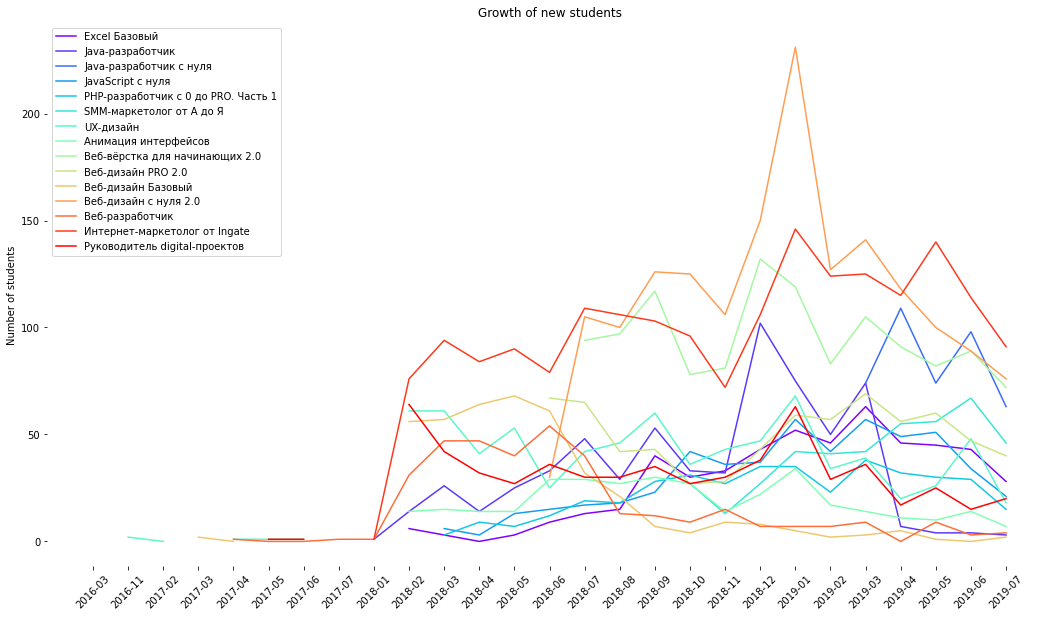

In [14]:
#Creating df with zero values
months_list = list(data1['month'].unique())
months_list.sort()
new_month_list = pd.Series(0, index=months_list)
#creating a line-graph combining all 15 lines for each course in one figure
plt.figure(figsize=(18,10))
i = 0
colors = iter(matplotlib.cm.rainbow(np.linspace(0,1,15)))
for line in range(15):
    result = pd.concat([sum_unstacked.loc[course_list[i]], new_month_list], axis = 1)
    result.fillna = 0.0
    plt.plot(list(range(result.index.nunique())), result[list_of_first_modules[i]], color = next(colors), label = course_list[i])
    plt.title('Growth of new students')
    plt.ylabel('Number of students')

    i += 1
plt.xticks(list(range(result.index.nunique())), labels = result.index, rotation = '45')
plt.legend()
plt.box(on=None)
plt.show()
    

In [15]:
#filling empty dates with number of the last date
data1['finish_date'] = data1['finish_date'].fillna(pd.to_datetime('20190730000000+0000', format = '%Y%m%d%H%M%S%f%z'))
#making a list of months for each progress
data1['exploded'] = data1.apply(lambda row: pd.date_range(start = row['start_date'],
                                                          end = row['finish_date'], freq="M"), axis = 1)


<ipython-input-15-aa49a385b002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['finish_date'] = data1['finish_date'].fillna(pd.to_datetime('20190730000000+0000', format = '%Y%m%d%H%M%S%f%z'))
<ipython-input-15-aa49a385b002>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['exploded'] = data1.apply(lambda row: pd.date_range(start = row['start_date'],


In [16]:
#exploding data
exploded_data = data1.explode('exploded')
exploded_data['exploded'] = exploded_data['exploded'].fillna(exploded_data['finish_date'])
exploded_data['exploded_month'] = exploded_data.exploded.dt.to_period('M')
progress_sum = exploded_data[['course_title', 'progress_id', 'exploded_month']].groupby(['course_title', 'exploded_month']).count()
progress_sum

C:\Users\like7\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


progress_id
course_title                  exploded_month             
Excel Базовый                 2018-02                  37
                              2018-03                   9
                              2018-04                  16
                              2018-05                  21
                              2018-06                  35
...                                                   ...
Руководитель digital-проектов 2019-03                 625
                              2019-04                 563
                              2019-05                 609
                              2019-06                 587
                              2019-07                 114

[254 rows x 1 columns]

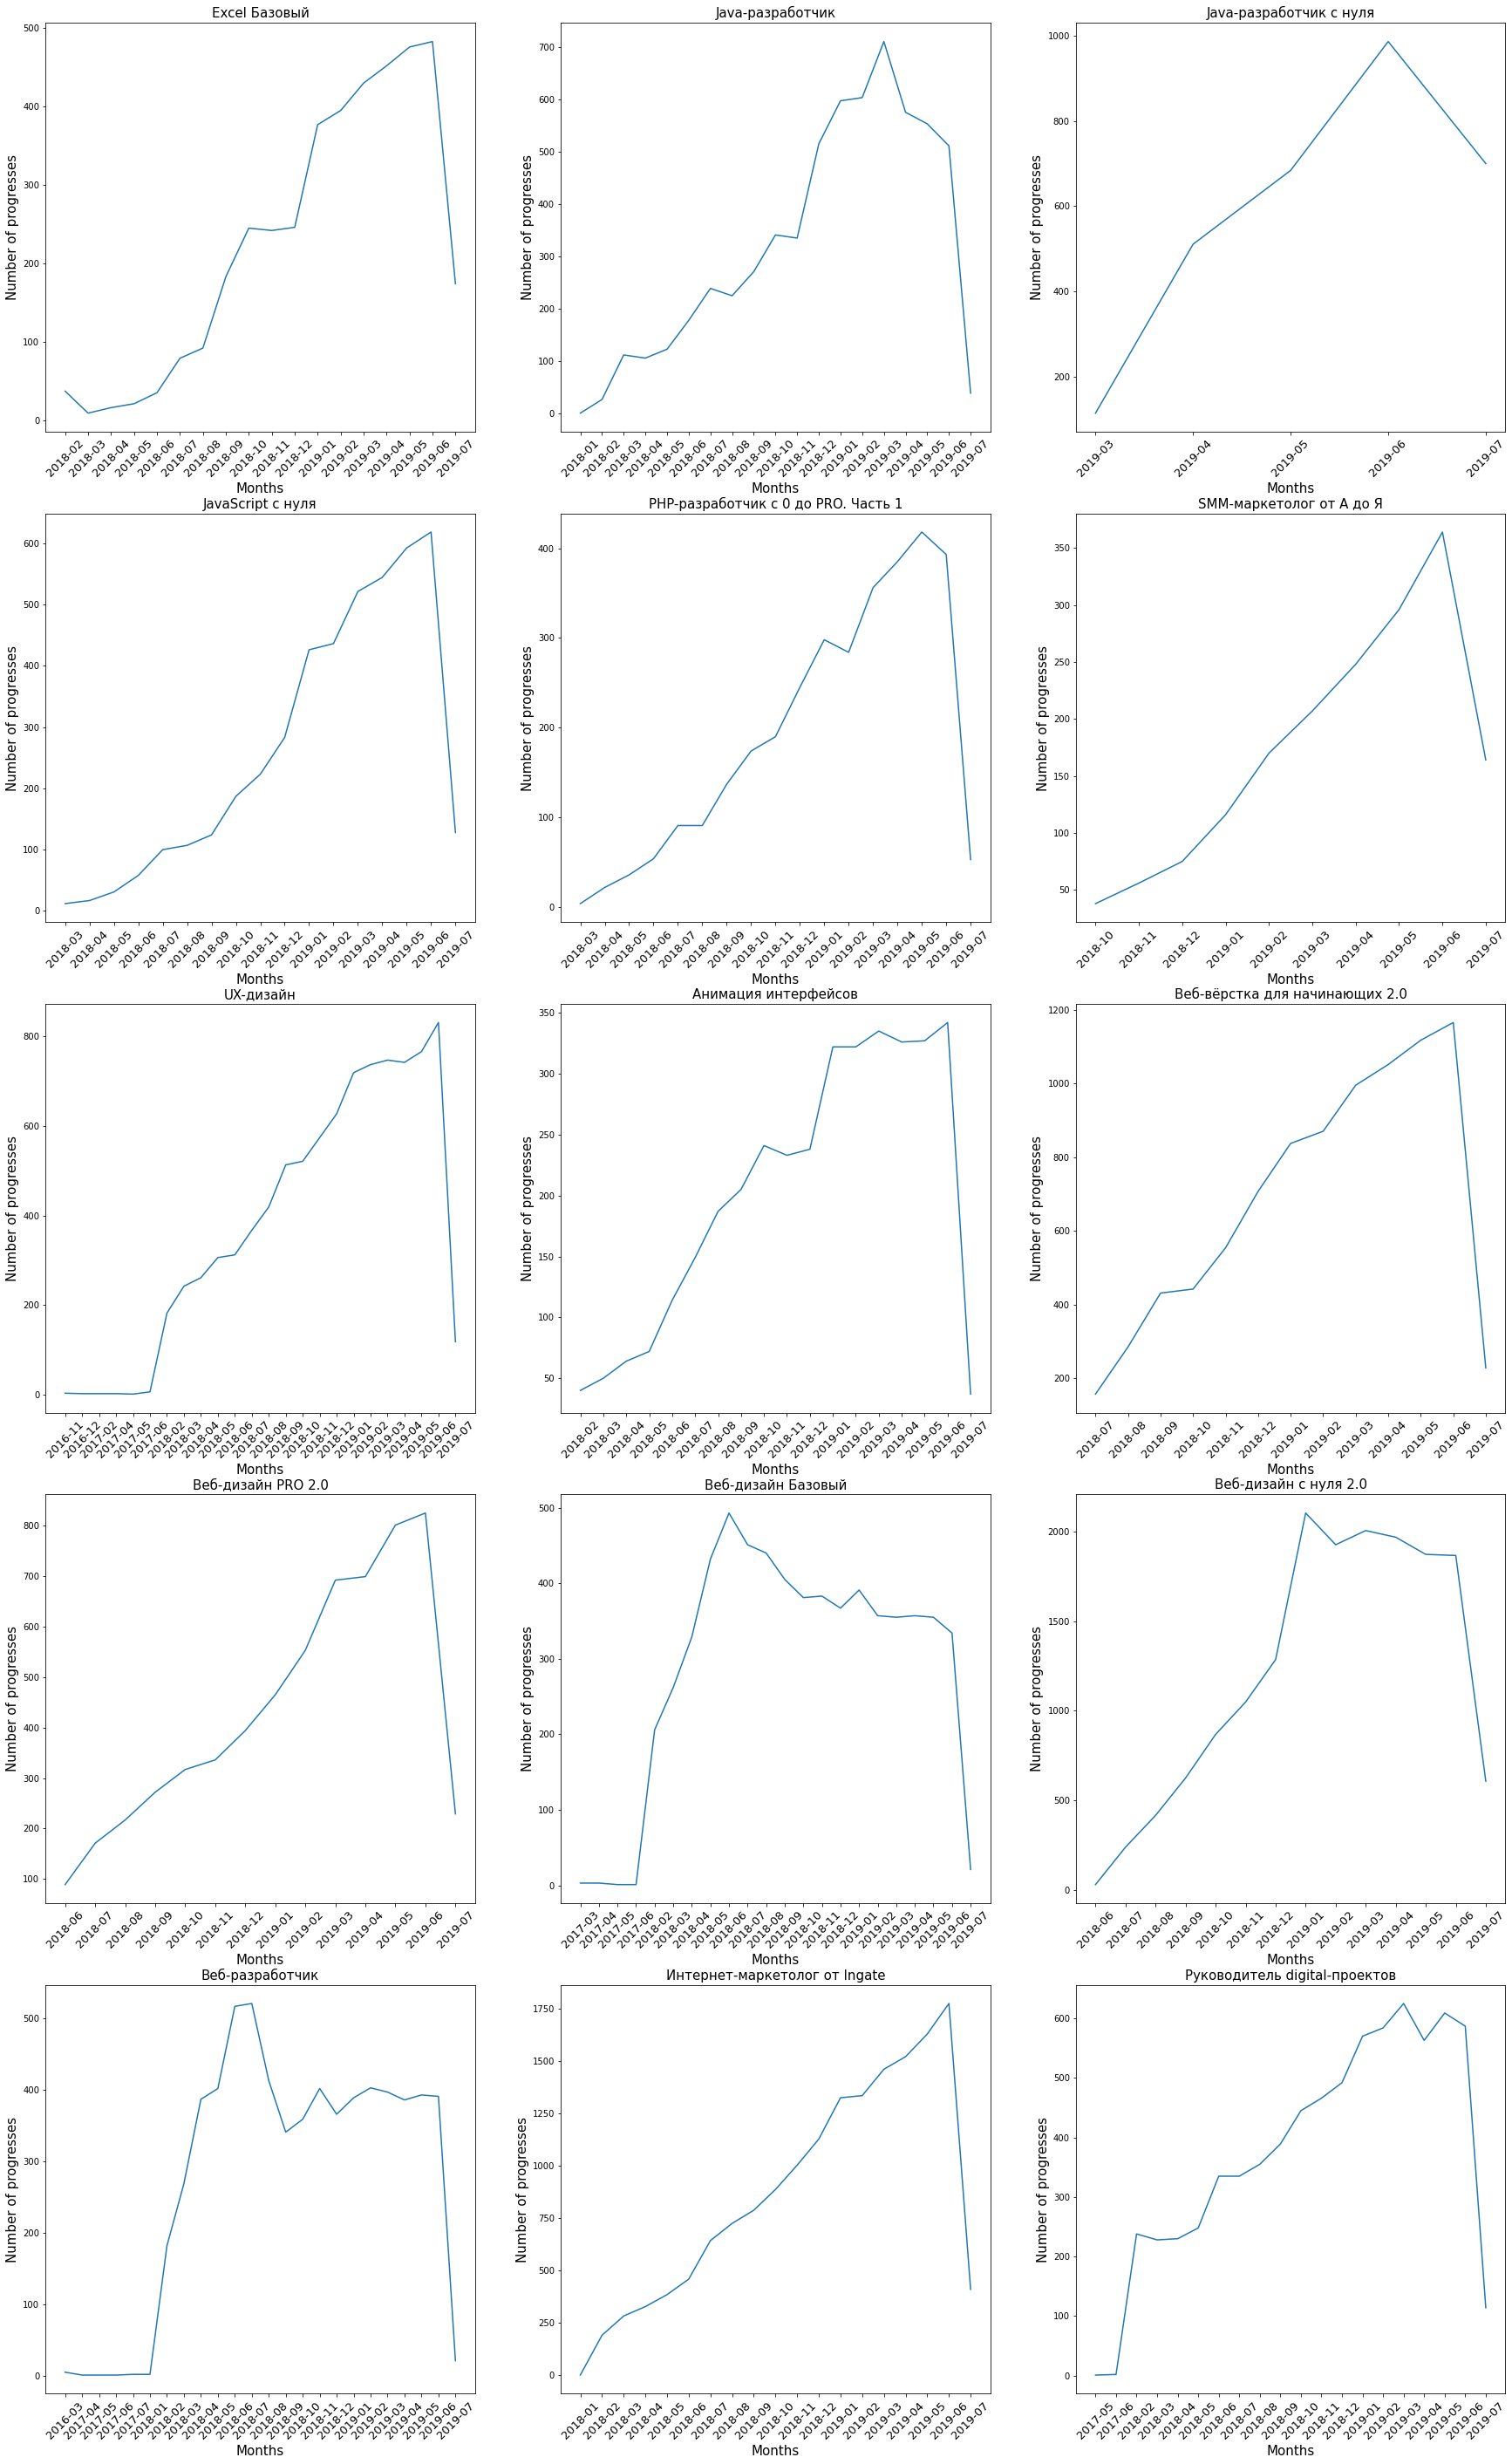

In [17]:
#plotting 15 graphs of progress increasing for each month
fig, axes = plt.subplots(5, 3, figsize=(30,50))
i = 0
for row in range(5):
    for column in range(3):
        axes[row, column].plot(list(range(progress_sum['progress_id'].loc[course_list[i]].index.nunique())),
                               progress_sum['progress_id'].loc[course_list[i]])
        axes[row, column].set_title(course_list[i], fontsize = 15)
        axes[row, column].set_xlabel('Months', fontsize = 15)
        axes[row, column].set_ylabel('Number of progresses', fontsize = 15)
        axes[row, column].set_xticks(list(range(progress_sum.loc[course_list[i]].index.nunique())))
        axes[row, column].set_xticklabels(progress_sum.loc[course_list[i]].index, rotation = 45, fontsize = 13)
        i += 1

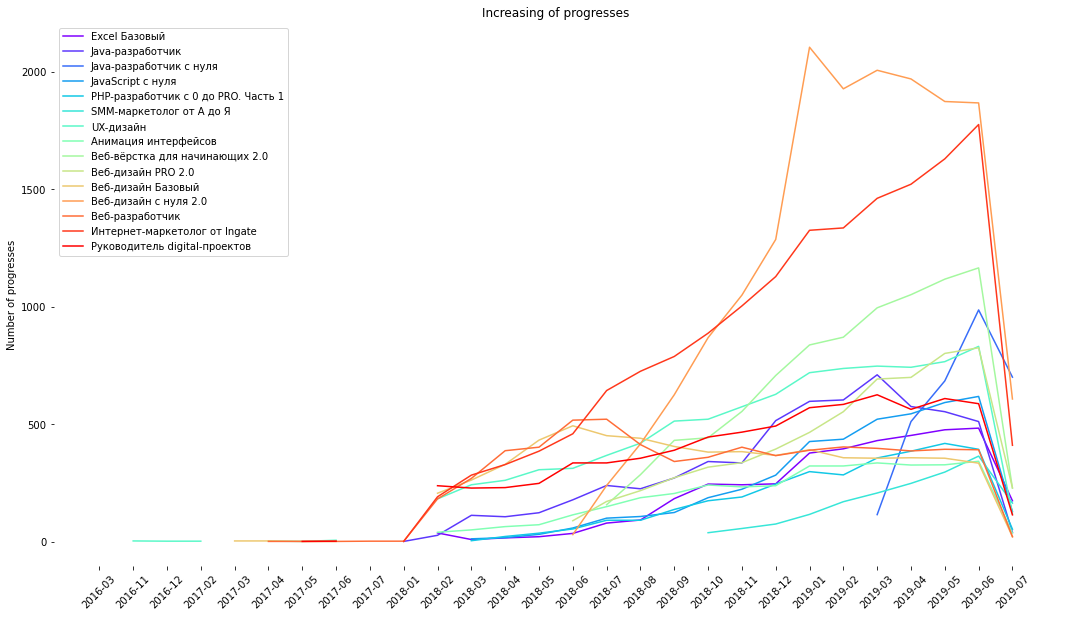

In [18]:
#creating emty list of dates
months_list = list(exploded_data['exploded_month'].unique())
months_list.sort()
new_month_list = pd.Series(0, index=months_list)
#plotting a figure
plt.figure(figsize=(18,10))
i = 0
colors = iter(matplotlib.cm.rainbow(np.linspace(0,1,15)))
for line in range(15):
    result = pd.concat([progress_sum['progress_id'].loc[course_list[i]], new_month_list], axis = 1)
    result.fillna = 0.0
    plt.plot(list(range(result['progress_id'].index.nunique())), result['progress_id'], color = next(colors), label = course_list[i])
    plt.title('Increasing of progresses')
    plt.ylabel('Number of progresses')
    i += 1
plt.xticks(list(range(result.index.nunique())), labels = result.index, rotation = '45')
plt.legend()
plt.box(on=None)
plt.show()

## Анализ графиков

Из графиков следует следубщие выводы:
* Если не учитывать последний месяц (так как скорее всего количество учеников в этом месяце прибавится и аномальное падение исчезнет) колическтво новых студентов растет
* Количество прогрессов увеличивается
Теперь касательно каждых курсов по отдельности

В курсе *Руководитель Digital проектов* наблюдается прекращение роста прогрессов

Наблюдается тренд на снижение количества прогрессов по курсам:
*Веб-дизайн Базовый*
*Веб - дизайн с нуля 2.0*
*Веб - Разработчик*
*Java - разработчик*

В остальных курсах увеличивается количество прогрессов, значит нагрузка там увеличивается

.

## 3. Выявление проблемных модулей

В данном разделе выполнен расчет по минимальному, максимальному, среднему, медианному времени прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

Чтобы выявить сезонность, посчитано медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 


In [19]:
#Sorting values with homework
data_module = data.loc[(data['lesson_title'] == 'Домашняя работа')]
data_module = data_module.dropna()
function = {'start_date': ['min'], 'finish_date': ['max']}
#Groupping to find minimum and maximum date of homework including modules with several homeworks
data_module_grouped = data_module[[
    'student_id', 'start_date', 'finish_date', 'course_title', 'module_title']].groupby([
    'course_title', 'module_title','student_id']).agg(function)
data_module_grouped['difference'] = data_module_grouped['finish_date']['max'] - data_module_grouped['start_date']['min']
data_module_grouped['difference'] = (data_module_grouped['difference'] / pd.Timedelta(1, unit='d')).apply(np.ceil)
#Если студент открыл домашку следующего модуля перед началом предыдущего
data_module_grouped['difference'] = data_module_grouped['difference'].replace(-0.0, 1)
data_module_grouped
#Regroupping df to show final result
data_module_grouped = data_module_grouped.swaplevel(0, 2, axis=0)
data_module_grouped = data_module_grouped.reset_index(level=['course_title', 'module_title'])
data_module_grouped_fin = data_module_grouped[['course_title','module_title', 'difference']].groupby([
    'course_title','module_title']).agg(['min', 'max', 'mean', 'median'])
#data_module_grouped_fin = data_module_grouped_fin['difference']['']
data_module_grouped_fin


C:\Users\like7\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


difference  \
                                                                                              
                                                                                        min   
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                                1.0   
                              Основной функционал Excel                                 1.0   
                              Основной функционал Excel (продолжение)                   1.0   
                              Сводные таблицы Excel                                     1.0   
                              Формулы и функции Excel. Более сложные формулы            1.0   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                         1.0   
                              Требовательность digital-продюсера                        1.0   
                              Управление временем                                       1.0   
                              Управление дизайнерами. Разработка дизайна по s...        1.0   
                              Экологичный путь менеджера                                1.0   

                                                                                         \
                                                                                          
                                                                                    max   
course_title                  module_title                                                
Excel Базовый                  Визуализация данных Excel                          175.0   
                              Основной функционал Excel                           184.0   
                              Основной функционал Excel (продолжение)             185.0   
                              Сводные таблицы Excel                               240.0   
                              Формулы и функции Excel. Более сложные формулы      176.0   
...                                                                                 ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   212.0   
                              Требовательность digital-продюсера                  397.0   
                              Управление временем                                 164.0   
                              Управление дизайнерами. Разработка дизайна по s...  200.0   
                              Экологичный путь менеджера                          246.0   

                                                                                             \
                                                                                              
                                                                                       mean   
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                          10.375000   
                              Основной функционал Excel                            6.467249   
                              Основной функционал Excel (продолжение)              4.768473   
                              Сводные таблицы Excel                                9.967742   
                              Формулы и функции Excel. Более сложные формулы       7.818519   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   21.727273   
                              Требовательность digital-продюсера                  17.971014   
                              Управление временем                                  8.131783   
                              Управление дизайнерами. 

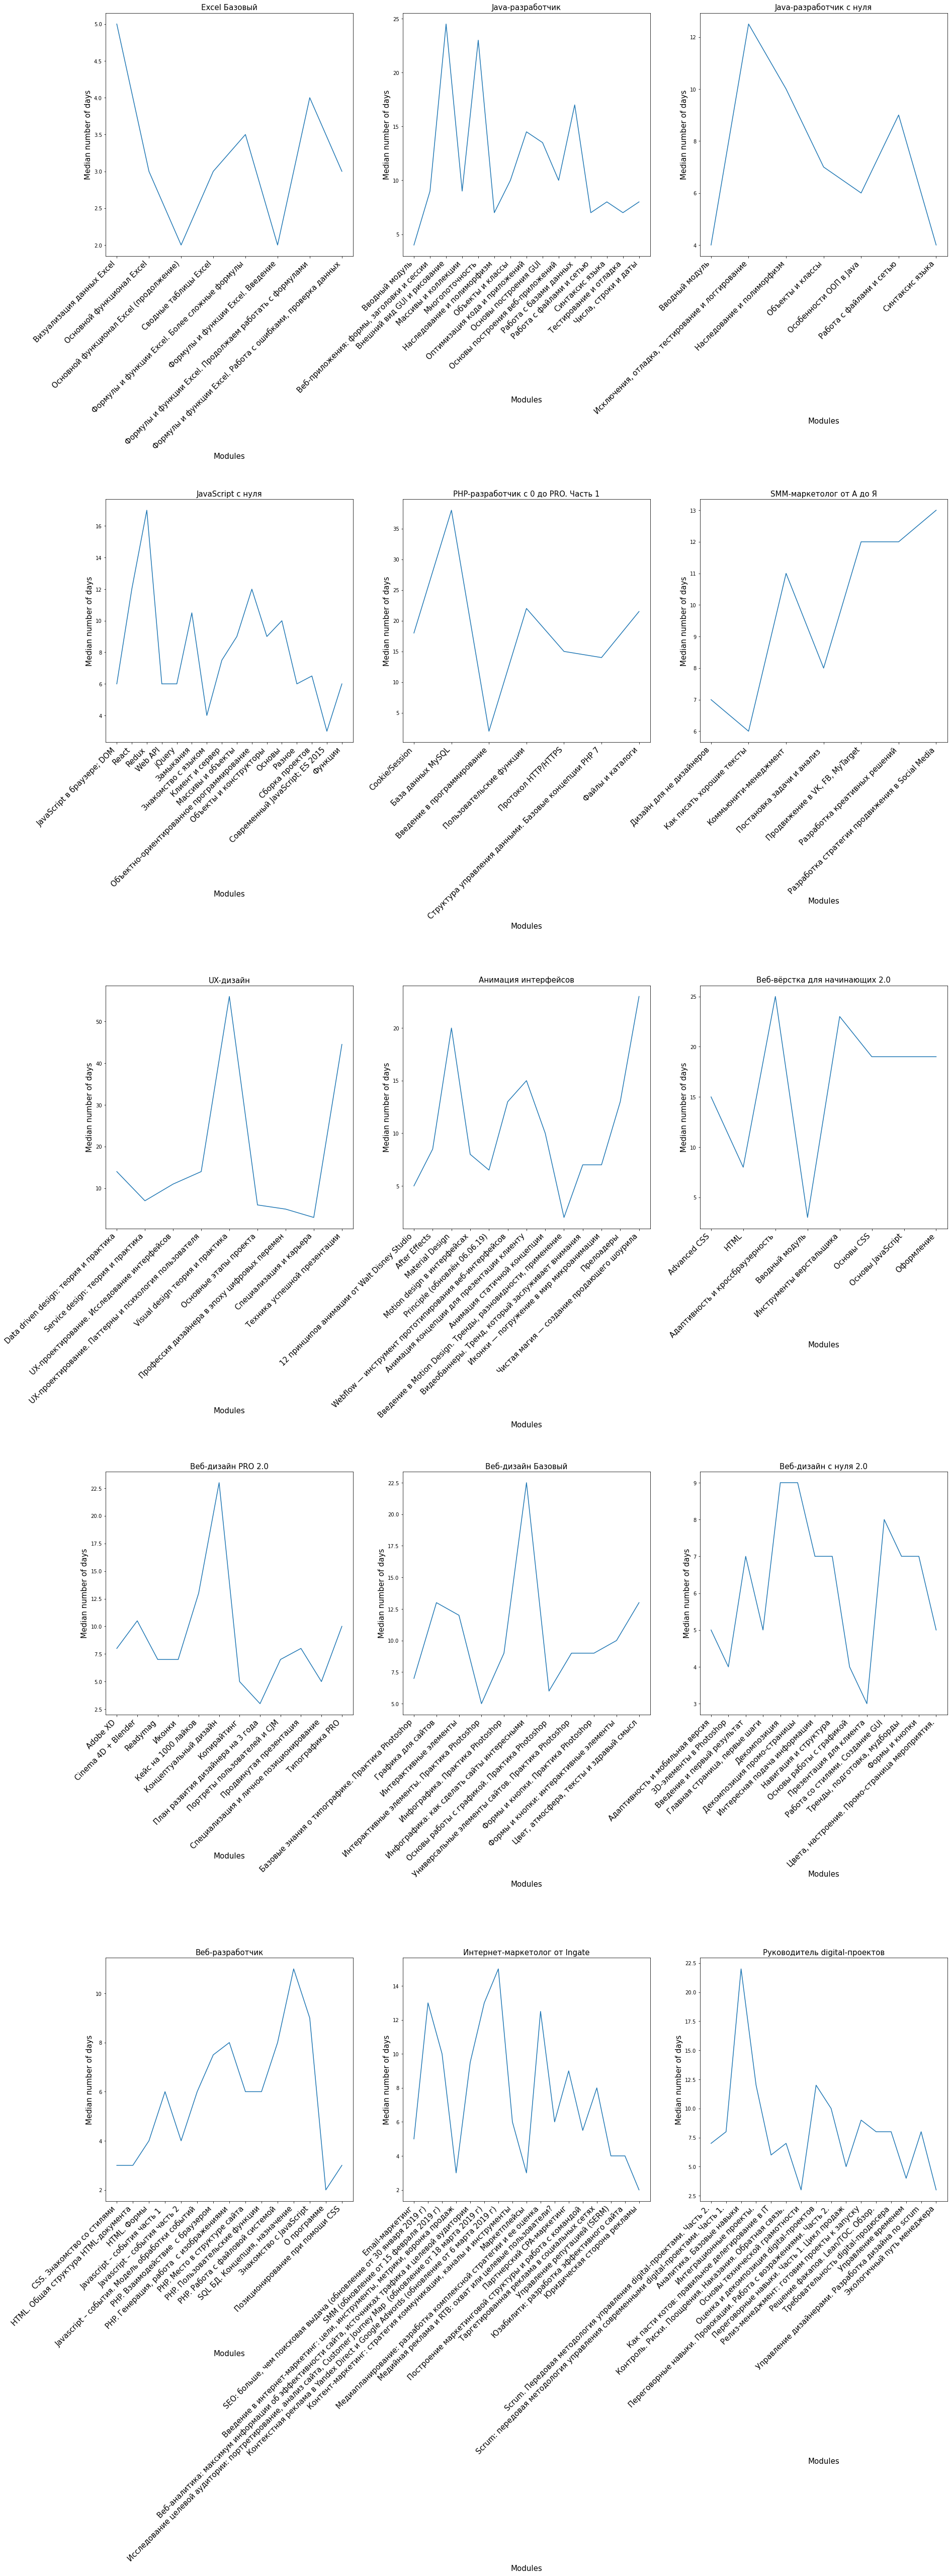

In [20]:
#plotting 15 graphs of progress increasing for each month
fig, axes = plt.subplots(5, 3, figsize=(30,80))
plt.subplots_adjust(hspace=1)
i = 0
for row in range(5):
    for column in range(3):
        axes[row, column].plot(list(range(data_module_grouped_fin['difference']['']['median'].loc[course_list[i]].index.nunique())),
                               data_module_grouped_fin['difference']['']['median'].loc[course_list[i]])
        axes[row, column].set_title(course_list[i], fontsize = 15)
        axes[row, column].set_xlabel('Modules', fontsize = 15)
        axes[row, column].set_ylabel('Median number of days', fontsize = 15)
        axes[row, column].set_xticks(list(range(data_module_grouped_fin.loc[course_list[i]].index.nunique())))
        axes[row, column].set_xticklabels(data_module_grouped_fin.loc[course_list[i]].index, rotation = 45, fontsize = 15, ha = 'right')
        i += 1


In [21]:
def compare_function(month1, month2, start, explode):
    if month1 == month2:
        return explode - start
    else:
        return explode - (explode - pd.offsets.MonthBegin(1))

#Если домашка переходит из одного месяца в другой, то дни выполнения считаются в каждом месяце отдельно

#Sorting values with homework
data_module_2 = data.loc[(data['lesson_title'] == 'Домашняя работа')]
data_module_2 = data_module_2.dropna()
data_module_2['exploded'] = data_module_2.apply(lambda row: pd.date_range(start = row['start_date'],
                                                         end = row['finish_date'], freq="M"), axis = 1)
#Extraxting month for each extracted end of month
exploded_data_2 = data_module_2.explode('exploded')
exploded_data_2['exploded'] = exploded_data_2['exploded'].fillna(exploded_data_2['finish_date'])
exploded_data_2['exploded_month'] = exploded_data_2.exploded.dt.to_period('M')
#Counting number of days for each homework in each month
exploded_data_2['difference'] = exploded_data_2.apply(lambda row: compare_function(row['month'], row['exploded_month'], 
                                                                                       row['start_date'], row['exploded']), axis = 1)
exploded_data_2['difference'] = (exploded_data_2['difference']/ pd.Timedelta(1, unit='d')).apply(np.ceil)
#Counting mean number of days for each homework
exploded_data_2_grouped = exploded_data_2[[
    'difference', 'course_title', 'exploded_month']].groupby(['course_title', 'exploded_month']).agg(['mean'])
exploded_data_2_grouped = exploded_data_2_grouped['difference']
exploded_data_2_grouped

C:\Users\like7\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


mean
course_title                  exploded_month           
Excel Базовый                 2018-02          0.685714
                              2018-03          9.000000
                              2018-04          6.909091
                              2018-05          4.750000
                              2018-06          2.750000
...                                                 ...
Руководитель digital-проектов 2019-03          9.406716
                              2019-04         11.704301
                              2019-05         10.111675
                              2019-06         11.650794
                              2019-07          4.560976

[254 rows x 1 columns]

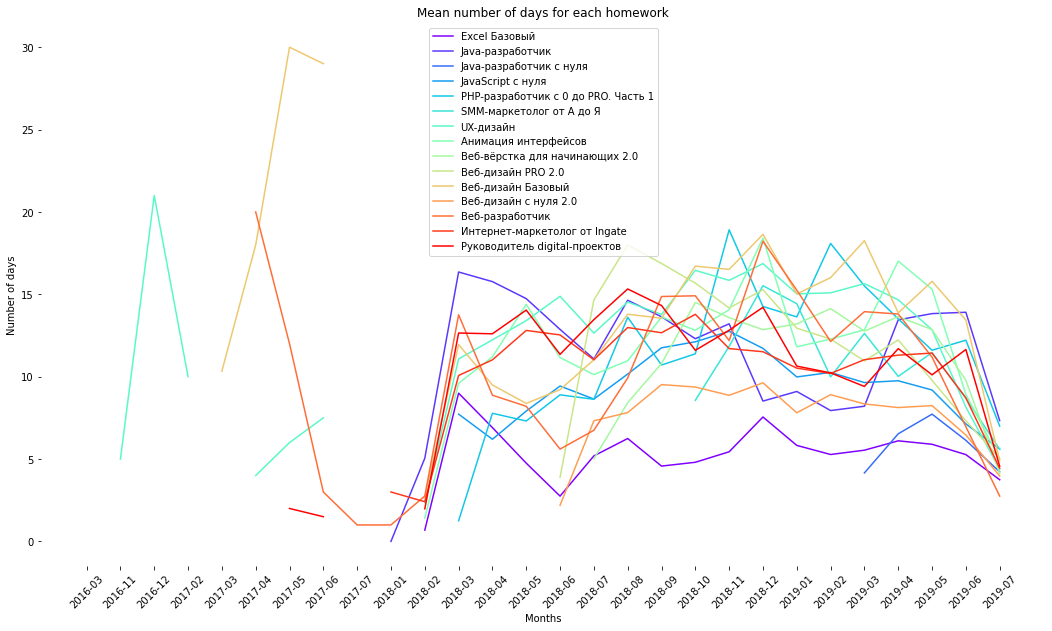

In [22]:
#creating emty list of dates
months_list = list(exploded_data_2['exploded_month'].unique())
months_list.sort()
new_month_list = pd.Series(0, index=months_list)
#plotting a figure
plt.figure(figsize=(18,10))
i = 0
colors = iter(matplotlib.cm.rainbow(np.linspace(0,1,15)))
for line in range(15):
    result = pd.concat([exploded_data_2_grouped['mean'].loc[course_list[i]], new_month_list], axis = 1)
    result.fillna = 0.0
    plt.plot(list(range(result['mean'].index.nunique())), result['mean'], color = next(colors), label = course_list[i])
    plt.title('Mean number of days for each homework')
    plt.ylabel('Number of days')
    plt.xlabel('Months')
    i += 1
plt.xticks(list(range(result.index.nunique())), labels = result.index, rotation = '45')
plt.legend()
plt.box(on=None)
plt.show()

In [23]:
#Проблемные модули для анализа

data_module_grouped_fin2 = data_module_grouped[['course_title', 'difference']].groupby([
    'course_title']).agg(['median'])
data_module_grouped_fin2 = data_module_grouped_fin2['difference']['median'] * 1.6
data_module_grouped_fin2
hard_module_list = []
i = 0
for row in range(15):
    for row in list(range(data_module_grouped_fin.loc[course_list[i]].index.nunique())):
        j = 0
        if data_module_grouped_fin.loc[course_list[i]]['difference']['']['median'].iloc[j] > data_module_grouped_fin2.loc[course_list[i]]:
            hard_module_list.append(data_module_grouped_fin.loc[course_list[i]].index[j])                
        j += 1
    i += 1
print(hard_module_list)
                


C:\Users\like7\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


[' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS']


## Анализ графиков

Из 15 графиков можно вычислить проблемные модули:
* ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', ' Визуализация данных Excel', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Cookie/Session', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS', 'Advanced CSS'

Также исхтдя из последнего графика можно увидеть увеличение количества дней на выполнение дз в июле и в начале января


## 4. Расчет конверсии

В данном разделе посчитана конверсия перехода студентов из одного модуля в другой на каждом курсе


In [24]:
conversion = data.loc[data['lesson_title'] == 'Домашняя работа']
conversion_groupped_1 = conversion.groupby(['course_title', 'module_number','module_title'])['status'].count()
conversion_groupped_1.head(50)

course_title                         module_number  module_title                                               
Excel Базовый                        1              Основной функционал Excel                                      518
                                     2              Основной функционал Excel (продолжение)                        434
                                     3              Формулы и функции Excel. Введение                              398
                                     4              Формулы и функции Excel. Продолжаем работать с формулами       345
                                     5              Формулы и функции Excel. Более сложные формулы                 298
                                     6              Формулы и функции Excel. Работа с ошибками, проверка данных    263
                                     7               Визуализация данных Excel                                     238
                                     8              Сво

In [25]:
#Группировка значений по минимальной и максимальной домашней работе
conversion = data.loc[data['is_homework'] == True]
conversion_grouped = conversion.groupby([
    'course_title', 'module_number', 'module_title','student_id'])['start_date', 'finish_date'].agg(function)
conversion_grouped = conversion_grouped.swaplevel(0, 3, axis=0)
conversion_grouped = conversion_grouped.reset_index(level=['course_title', 'module_number', 'module_title', 'student_id'])
conversion_grouped_fin = conversion_grouped.groupby([
    'course_title', 'module_number','module_title']).count()
conversion_grouped_fin.reset_index(level=1, drop=True, inplace=True)
#Смещение значений по строке завершения работы на один
conversion_grouped_fin['finish_date'] = conversion_grouped_fin['finish_date'].shift(1)
#Удаление первой строки так как там нет прироста новых учеников
conversion_grouped_fin = conversion_grouped_fin.groupby('course_title', group_keys=False).apply(lambda x:x.iloc[1:])
conversion_grouped_fin['conversion'] = conversion_grouped_fin['start_date']['min']/conversion_grouped_fin['finish_date']['max']
conversion_grouped_fin

<ipython-input-25-39fb531a1f22>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  conversion_grouped = conversion.groupby([


student_id  \
                                                                                              
course_title                  module_title                                                    
Excel Базовый                 Основной функционал Excel (продолжение)                   434   
                              Формулы и функции Excel. Введение                         398   
                              Формулы и функции Excel. Продолжаем работать с ...        345   
                              Формулы и функции Excel. Более сложные формулы            298   
                              Формулы и функции Excel. Работа с ошибками, про...        263   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                          95   
                              Интеграционные проекты.                                    87   
                              Управление дизайнерами. Разработка дизайна по s...         71   
                              Основы технической грамотности                             66   
                              Контроль. Риски. Поощрения. Наказания. Обратная...         64   

                                                                                 start_date  \
                                                                                        min   
course_title                  module_title                                                    
Excel Базовый                 Основной функционал Excel (продолжение)                   434   
                              Формулы и функции Excel. Введение                         398   
                              Формулы и функции Excel. Продолжаем работать с ...        345   
                              Формулы и функции Excel. Более сложные формулы            298   
                              Формулы и функции Excel. Работа с ошибками, про...        263   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                          95   
                              Интеграционные проекты.                                    87   
                              Управление дизайнерами. Разработка дизайна по s...         71   
                              Основы технической грамотности                             66   
                              Контроль. Риски. Поощрения. Наказания. Обратная...         64   

                                                                                 finish_date  \
                                                                                         max   
course_title                  module_title                                                     
Excel Базовый                 Основной функционал Excel (продолжение)                  458.0   
                              Формулы и функции Excel. Введение                        406.0   
                              Формулы и функции Excel. Продолжаем работать с ...       387.0   
                              Формулы и функции Excel. Более сложные формулы           303.0   
                              Формулы и функции Excel. Работа с ошибками, про...       270.0   
...                                                                                      ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                         98.0   
                              Интеграционные проекты.                                   88.0   
                              Управление дизайнерами. Разработка дизайна по s...        69.0   
                              Основы технической грамотности                            64.0   
                              Контроль. Риски. Поощрения. Наказания. Обратная...        64.0   

                                                                          

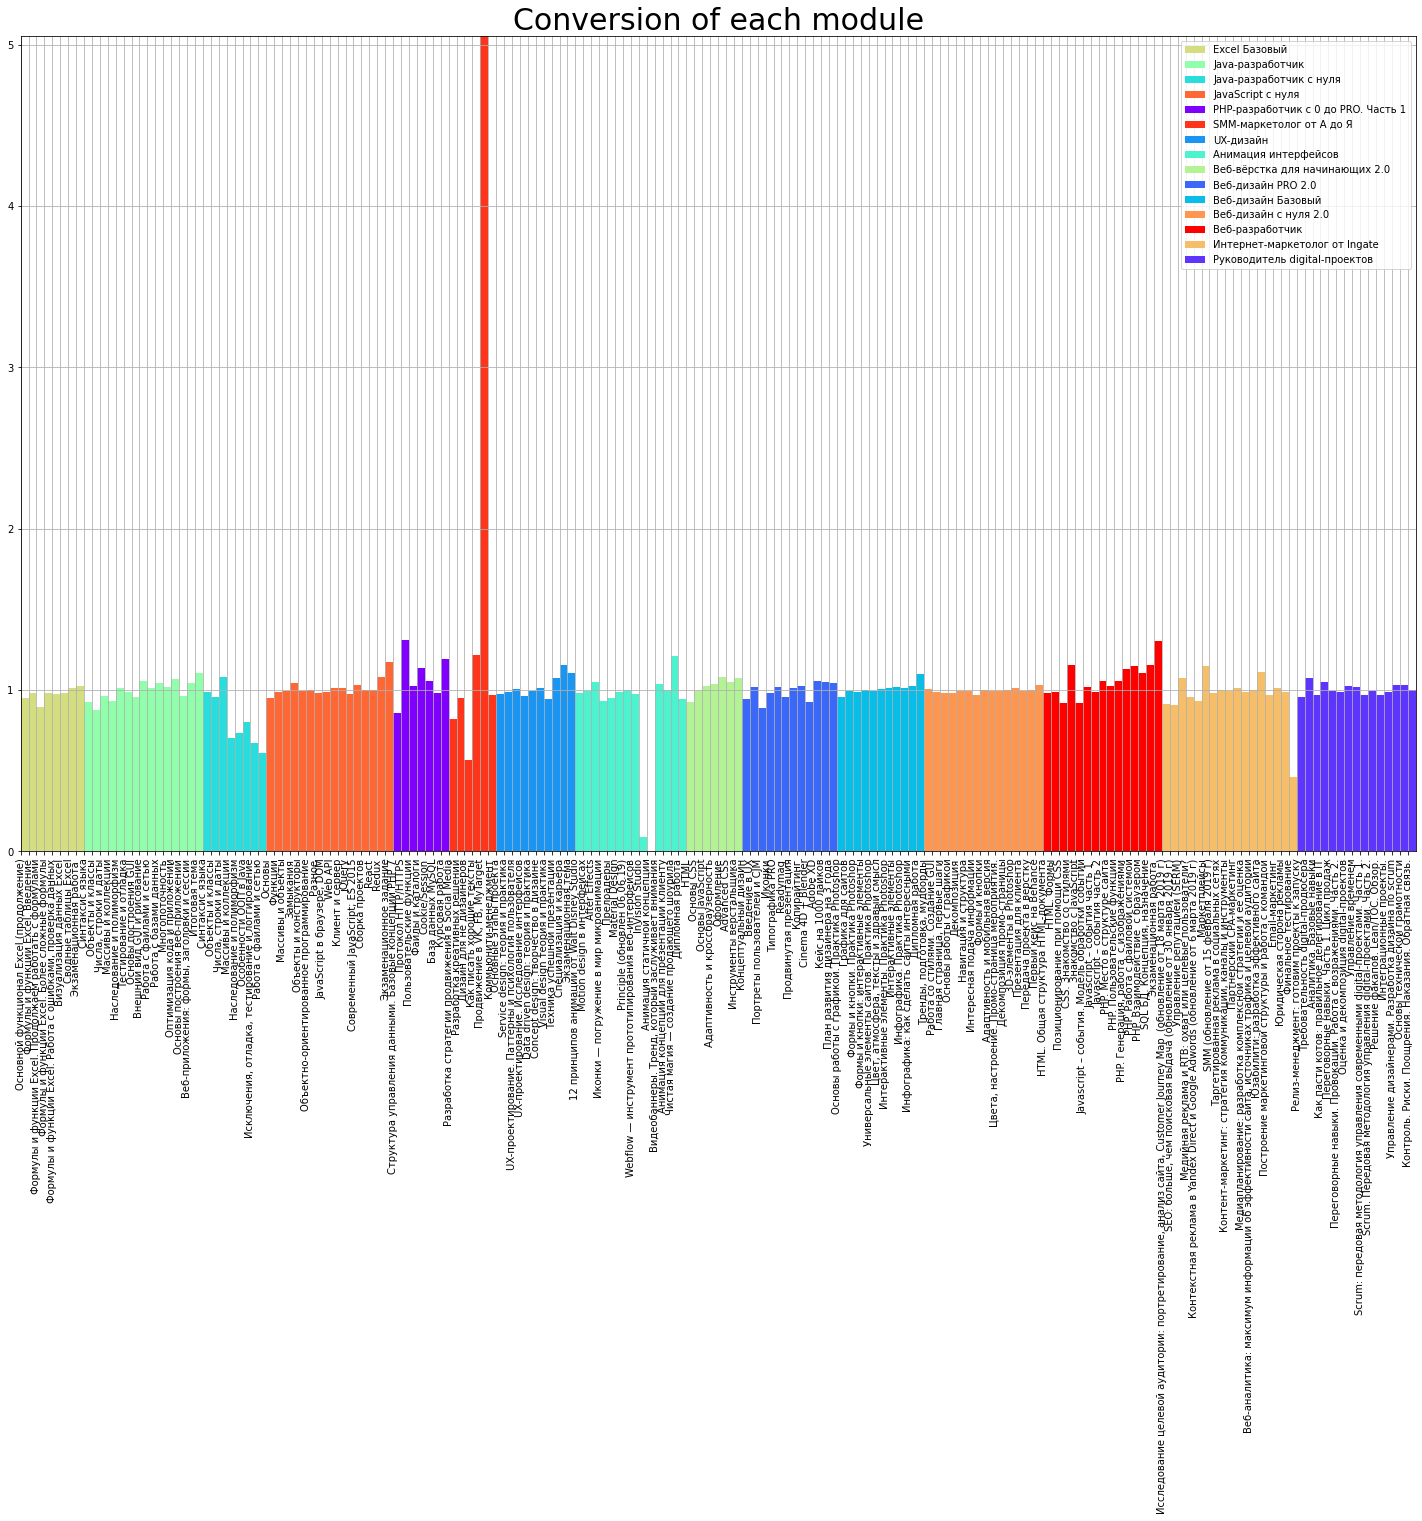

In [26]:
plt.figure(figsize=(25,15))
x = list(range(len(conversion_grouped_fin.index)))
#Colors
a = np.linspace(0,1,16)
np.random.shuffle(a)
colors = iter(matplotlib.cm.rainbow(a))
i = 0
j = 0
k = 0
current_color = next(colors)
for course in course_list:
    j = 0
    for module in list(conversion_grouped_fin.loc[course_list[i]].index):
        plt.bar(x[k], conversion_grouped_fin['conversion'].loc[course_list[i]].iloc[j],
                color = current_color, label = course_list[i], width = 1.0, align = 'edge')
        k += 1
        j += 1
    i += 1
    current_color = next(colors)
#Titles
plt.title('Conversion of each module', fontsize = 30)
plt.xticks(x, conversion_grouped_fin.index.get_level_values(1), rotation = 90)
#Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#Grid
plt.grid(True)
#Deletting gap on the left side
plt.margins(-0)
plt.show()

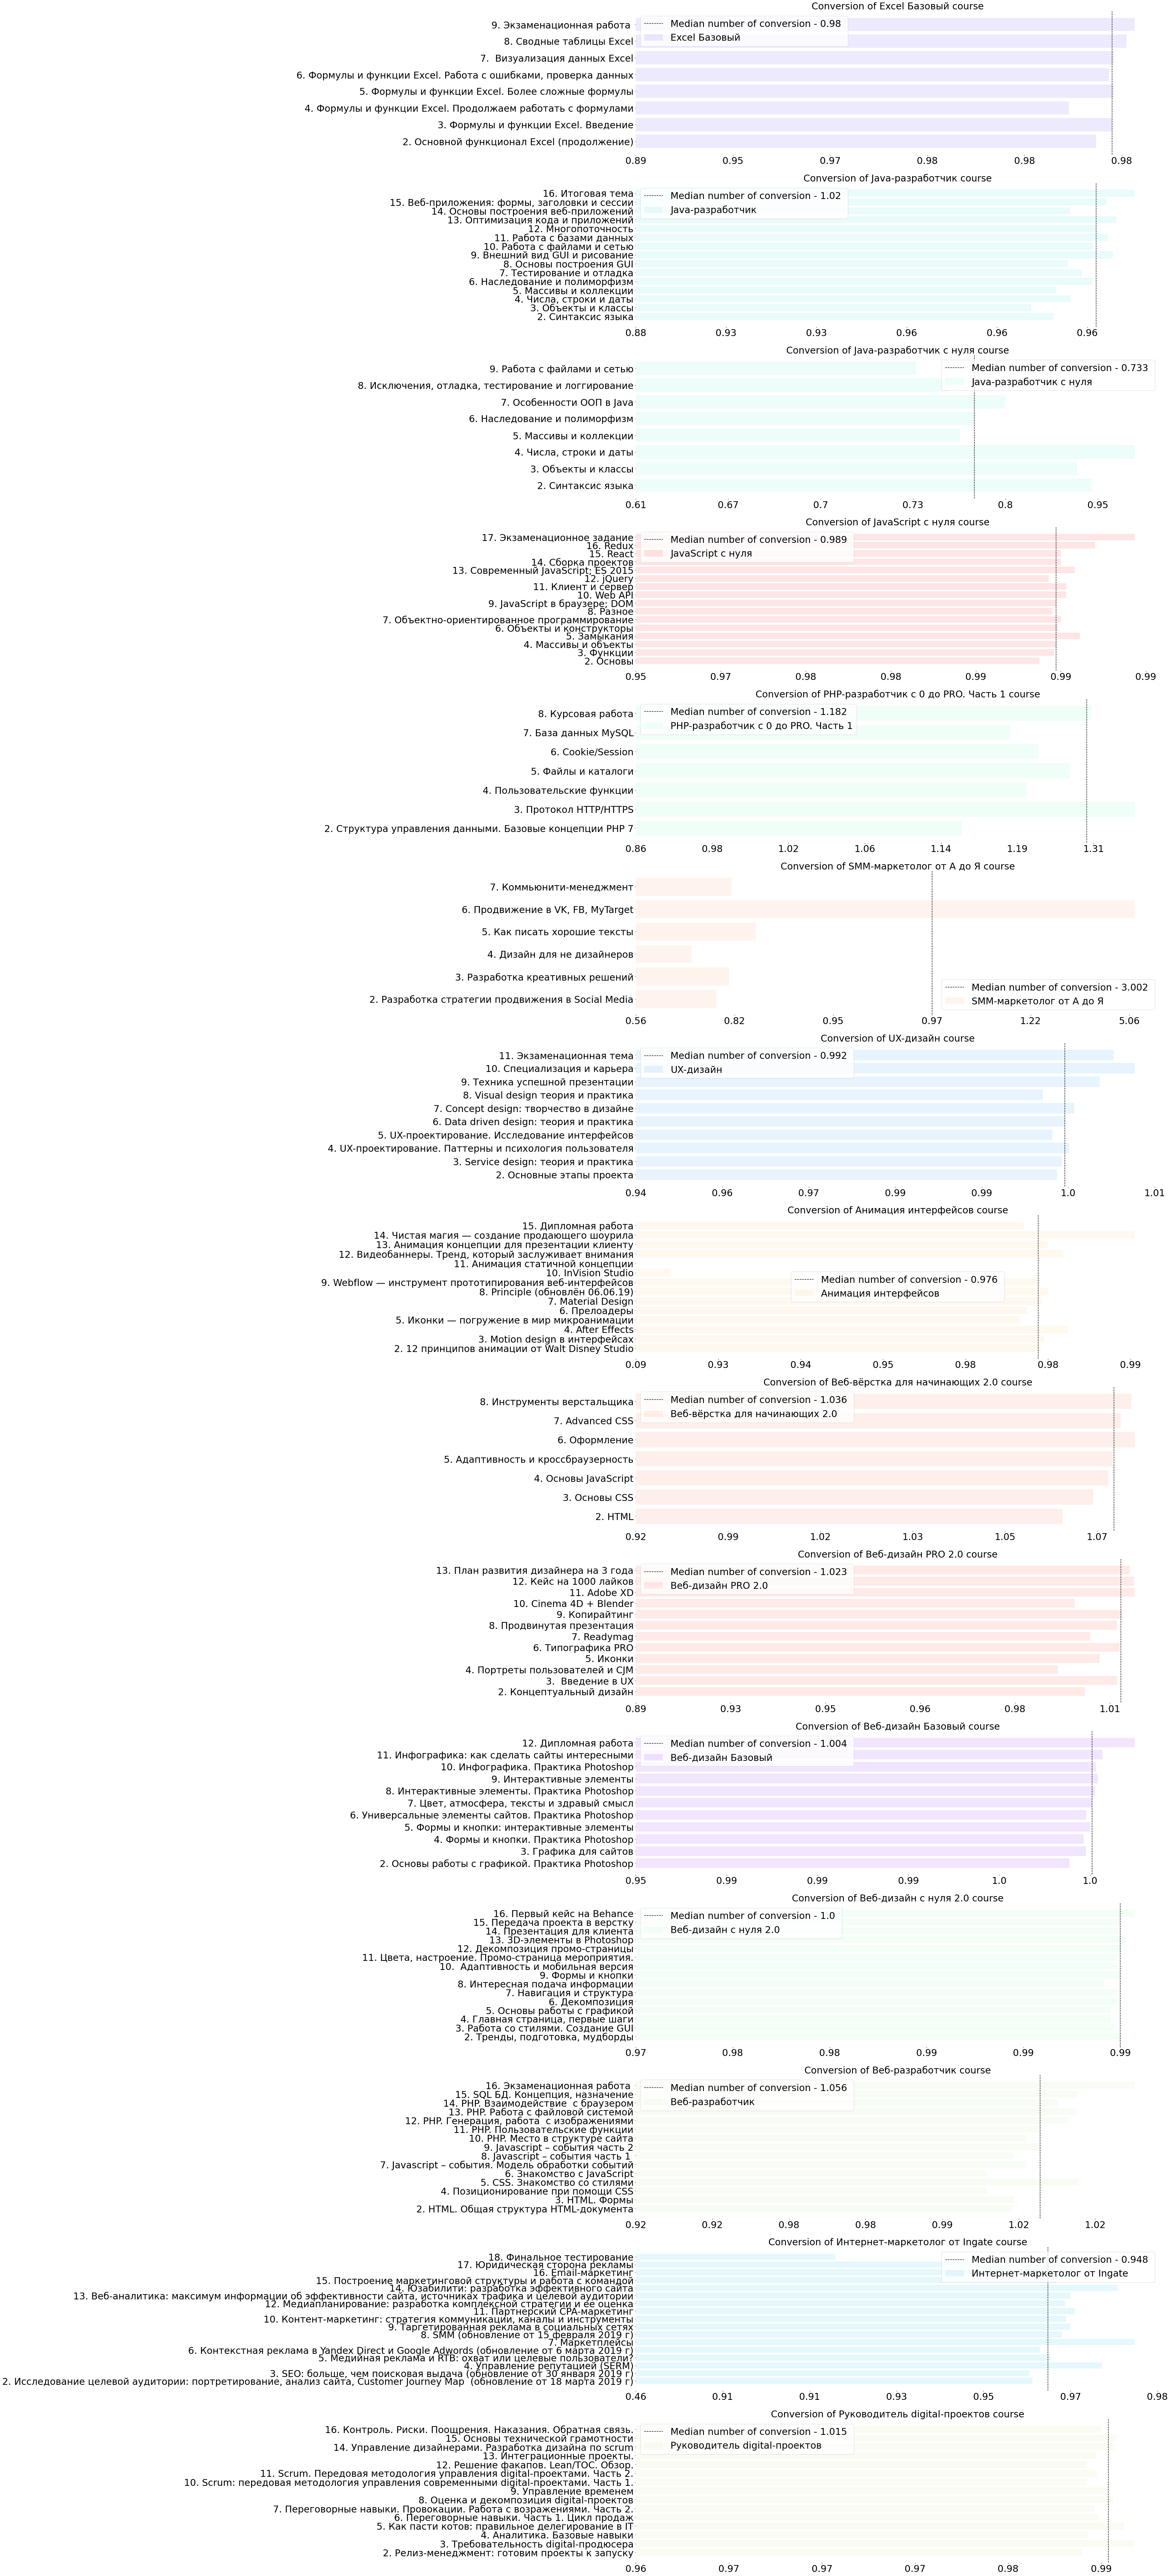

In [27]:
fig, axes = plt.subplots(15, 1, figsize=(30,150))
#Creating random colors
a = np.linspace(0,1,16)
np.random.shuffle(a)
colors = iter(matplotlib.cm.rainbow(a))
i = 0
for row in range(15):
    #Making bar-chart
    axes[row].barh(list(range(
        conversion_grouped_fin['conversion'].loc[course_list[i]].index.nunique())),
                            conversion_grouped_fin['conversion'].loc[course_list[i]],
                            color = next(colors), label = course_list[i], alpha=0.1)
    #Setting ticks
    number_module = list(np.arange(2, len(conversion_grouped_fin['conversion'].loc[course_list[i]].index) + 2))
    number_module = [str(x) for x in number_module]
    module_list = list(conversion_grouped_fin['conversion'].loc[course_list[i]].index)
    module_list = [str(x) for x in module_list]
    module_list_zip = ['. '.join(x) for x in zip(number_module, module_list)]
    module_title = conversion_grouped_fin['conversion'].loc[course_list[i]]
    axes[row].set_yticks(np.arange(len(module_list_zip)))
    axes[row].set_xticklabels(np.around(sorted(module_title), decimals = 2), fontsize = 30)
    axes[row].set_yticklabels(module_list_zip, fontsize = 30)
    #Setting titles
    axes[row].set_title('Conversion of ' + course_list[i] + ' course' , fontsize = 30)
    #Setting median line
    median_value_conversion = np.around(
        np.median(np.array(conversion_grouped_fin['conversion'].loc[course_list[i]]).flatten()[1::3]), decimals = 3)
    axes[row].axvline(x = median_value_conversion, ls = '--', color = 'black',
            label = 'Median number of conversion - {} '.format(median_value_conversion))
    #Making legend table
    axes[row].legend(fontsize = 30)
    #Setting ivisible frame
    axes[row].spines["top"].set_alpha(0)
    axes[row].spines["bottom"].set_alpha(0)
    axes[row].spines["right"].set_alpha(0)
    axes[row].spines["left"].set_alpha(0)
    axes[row].margins()
    i += 1
plt.show()

Существует тренд на снижение переходов по модулям в течении продвижения по курсу(меньше людей заканчивают курс, чем его начинают)

В курсе Java-разработчик с нуля, отчетливо видно падение перехода с модуля на модуль после 4 модуля, что может свидетельствовать о плохом качестве объяснения модулей.
Тоже самое в курсе Анимация интерфейсов

В курсе Интернет-маркетолог от Ingate финальное задание прошло гораздо меньше людей, чем проходили модули, что омжет говорить о несоответствии знаний полученых за курс с сложностью материала теста



## 5. Метрика успеваемости 


Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных выведены метрики помогающие выявить эту причину.

In [28]:
data

progress_id  module_number  lesson_number status  \
0       a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1       a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2       a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3       a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4       a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   
...                                  ...            ...            ...    ...   
350672  ea9c93865c1de54a5079b7ae71c88683              3              2  start   
350673  ea9c93865c1de54a5079b7ae71c88683              2              4   done   
350674  ea9c93865c1de54a5079b7ae71c88683              2              3   done   
350675  ea9c93865c1de54a5079b7ae71c88683              2              2   done   
350676  ea9c93865c1de54a5079b7ae71c88683              3              1   done   

                             start_date                      finish_date  \
0      2018-06-23 08:28:50.681065+00:00 2018-06-23 08:28:52.439542+00:00   
1      2018-06-20 14:25:21.783762+00:00 2018-06-20 15:45:07.717209+00:00   
2      2018-06-23 08:18:09.653771+00:00 2018-06-23 08:18:12.784616+00:00   
3      2018-06-20 16:00:06.361780+00:00 2018-06-21 19:09:30.845034+00:00   
4      2018-06-21 19:10:36.957891+00:00 2018-06-28 15:59:25.320418+00:00   
...                                 ...                              ...   
350672 2019-07-16 23:02:33.482900+00:00                              NaT   
350673 2019-07-02 15:34:32.134806+00:00 2019-07-02 16:32:15.491277+00:00   
350674 2019-07-01 21:46:27.908354+00:00 2019-07-01 21:48:04.806799+00:00   
350675 2019-06-30 22:41:33.705765+00:00 2019-07-01 07:44:00.370798+00:00   
350676 2019-07-14 23:36:52.318819+00:00 2019-07-15 12:21:47.908115+00:00   

                              student_id                         course_id  \
0       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
2       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
3       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
4       768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
...                                  ...                               ...   
350672  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350673  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350674  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350675  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   
350676  25ec58029696f8b7de38d22e5e01c7ea  bf27a4bf4ada4c756451703ea62a914f   

                         course_title course_field  \
0                  Веб-дизайн PRO 2.0       Design   
1                  Веб-дизайн PRO 2.0       Design   
2                  Веб-дизайн PRO 2.0       Design   
3                  Веб-дизайн PRO 2.0       Design   
4                  Веб-дизайн PRO 2.0       Design   
...                               ...          ...   
350672  Интернет-маркетолог от Ingate    Marketing   
350673  Интернет-маркетолог от Ingate    Marketing   
350674  Интернет-маркетолог от Ingate    Marketing   
350675  Интернет-маркетолог от Ingate    Marketing   
350676  Интернет-маркетолог от Ingate    Marketing   

                                             module_title  \
0                                   Концептуальный дизайн   
1                 Специализация и личное позиционирование   
2                                   Концептуальный дизайн   
3                 Специализация и личное позиционирование   
4                 Специализация и личное позиционирование   
...                                                   ...   
350672  SEO: больше, чем поисковая выдача (обновление ...   
350673  Исследование целевой аудитории: портретировани...   
350674  

In [29]:
dead_date = pd.to_datetime('20180730000000+0000', format = '%Y%m%d%H%M%S%f%z')
academic_perfomance = data.loc[(data['status'] != 'done')\
                               & (data['start_date'] < dead_date)]
academic_perfomance = academic_perfomance.groupby(['course_title', 'module_number'])['student_id'].count()
academic_perfomance.head(20)

course_title       module_number
Excel Базовый      1                28
                   2                 1
                   4                 1
                   5                 1
                   8                 1
                   9                 5
Java-разработчик   1                42
                   2                46
                   3                62
                   4                41
                   5                12
                   6                 7
                   7                 8
                   8                 2
                   10                2
                   11                2
                   17                1
JavaScript с нуля  1                43
                   2                10
                   3                 3
Name: student_id, dtype: int64

На этом графике представлена статистика по студентам кто не продвигается по учебе больше, чем год. Причины приостановки курса различные и будут проанализированы дальше

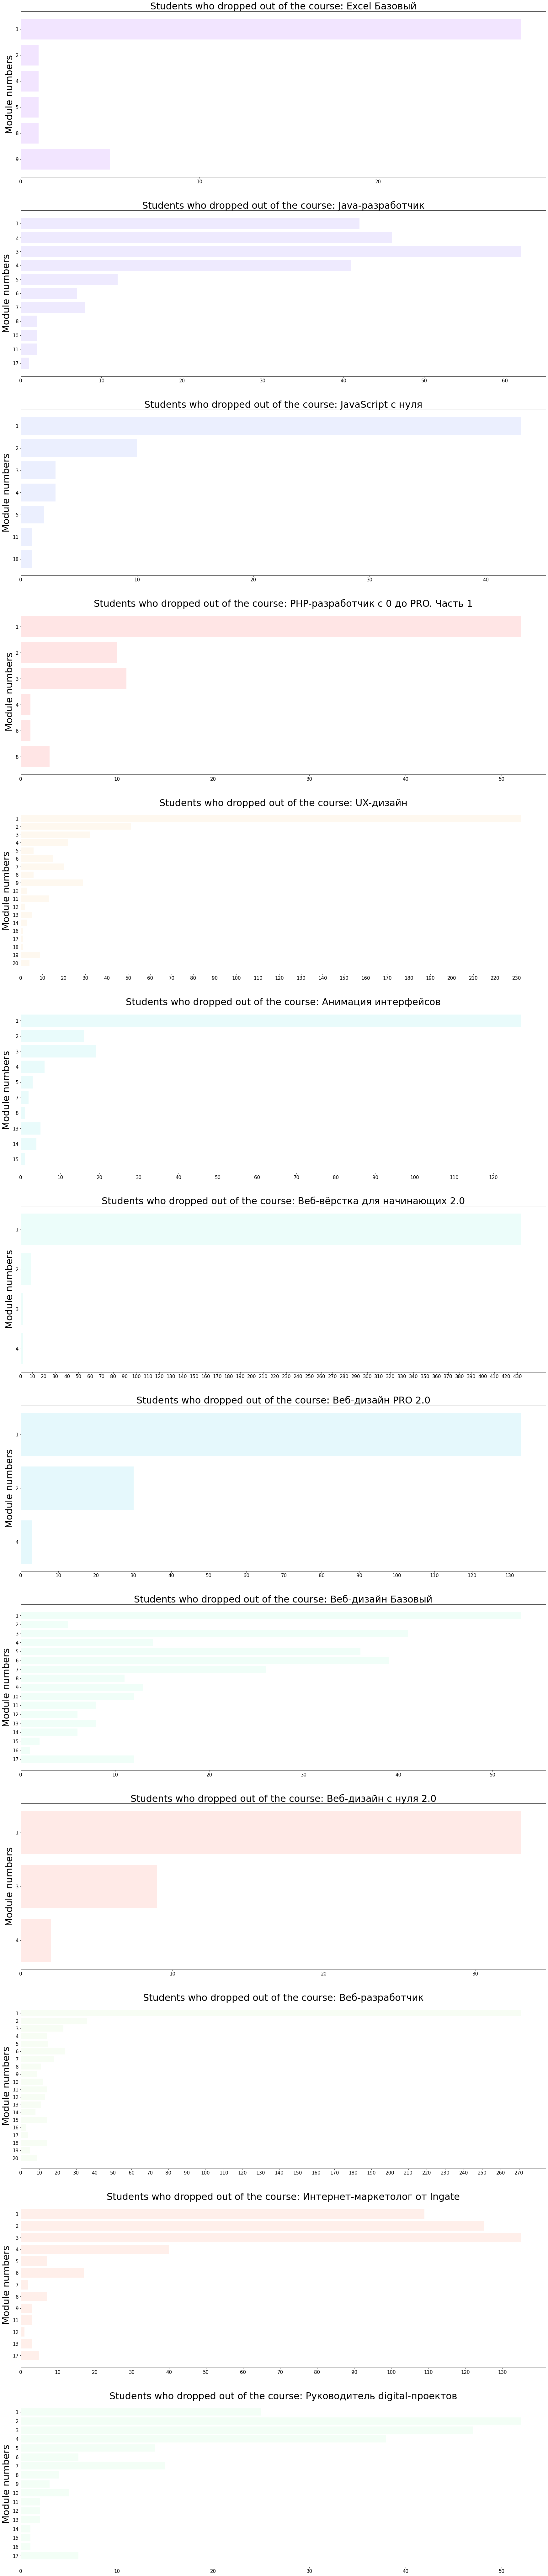

In [89]:
course_list_1 = academic_perfomance.unstack().index
fig, axes = plt.subplots(course_list_1.nunique(), 1, figsize=(30,150))
#Creating random colors
a = np.linspace(0,1,16)
np.random.shuffle(a)
colors = iter(matplotlib.cm.rainbow(a))
i = 0
for row in range(course_list_1.nunique()):
    #Making bar-chart
    axes[row].barh(list(range(
        academic_perfomance.loc[course_list_1[i]].index.nunique())),
                            academic_perfomance.loc[course_list_1[i]][::-1],
                            color = next(colors), label = course_list_1[i], alpha=0.1)
    #Making ticks
    axes[row].set_yticks(np.arange(len(academic_perfomance.loc[course_list_1[i]].index)))
    axes[row].set_yticklabels(academic_perfomance.loc[course_list_1[i]][::-1].index, fontsize = 15)
    axes[row].set_xticks(range(0, max(academic_perfomance.loc[course_list_1[i]]), 10))
    axes[row].set_xticklabels(range(0, max(academic_perfomance.loc[course_list_1[i]]), 10), fontsize = 15)
    #Making titles
    axes[row].set_title('Students who dropped out of the course: ' + course_list_1[i] , fontsize = 30)
    axes[row].set_ylabel('Module numbers', fontsize =30)
    i += 1
plt.show()

In [92]:
academic_perfomance_1 = data.loc[(data['status'] != 'done')\
                               & (data['start_date'] < dead_date)\
                               & (data['is_homework'] == False)]
academic_perfomance_1 = academic_perfomance_1.groupby(['course_title', 'module_number'])['student_id'].count()
academic_perfomance_1.head(20)

course_title                         module_number
Excel Базовый                        1                 26
                                     2                  1
                                     4                  1
                                     5                  1
Java-разработчик                     1                 25
                                     2                 22
                                     3                 45
                                     4                 36
                                     5                  8
                                     6                  5
                                     7                  4
                                     8                  1
JavaScript с нуля                    1                 37
                                     2                  1
                                     3                  3
                                     5                  1
PHP-разработчик с 0 д

График тех сутдентов, кто отсановился на модуле без начатой домашней работы. Это может сказать о том, что у студента пропала мотивация, а не из-за невозможности выполнения домашней работы.

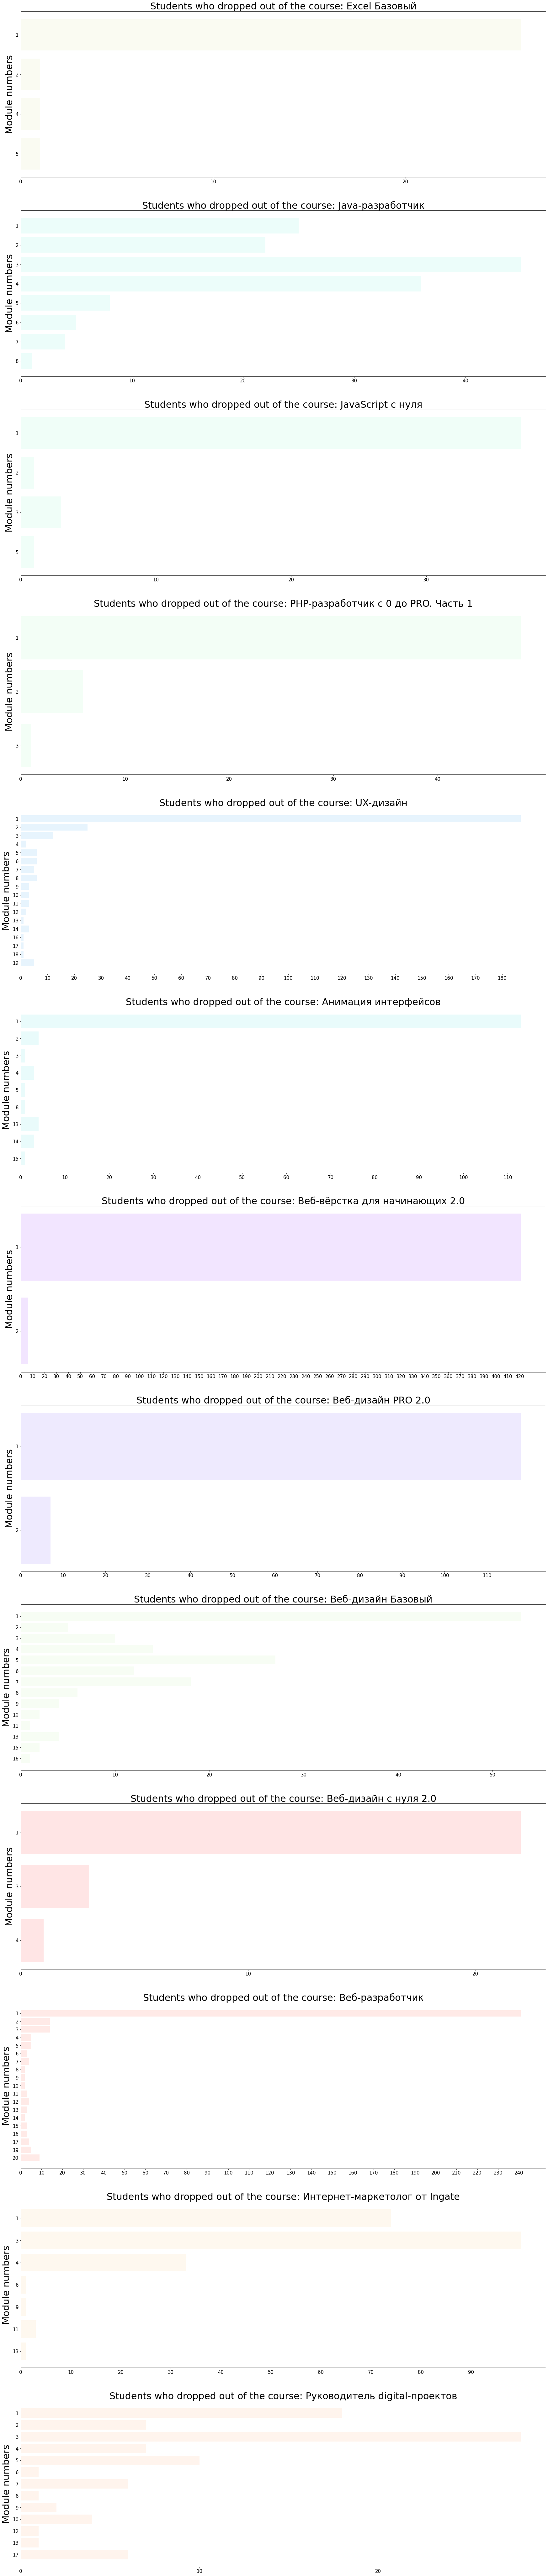

In [93]:
course_list_1 = academic_perfomance_1.unstack().index
fig, axes = plt.subplots(course_list_1.nunique(), 1, figsize=(30,150))
#Creating random colors
a = np.linspace(0,1,16)
np.random.shuffle(a)
colors = iter(matplotlib.cm.rainbow(a))
i = 0
for row in range(course_list_1.nunique()):
    #Making bar-chart
    axes[row].barh(list(range(
        academic_perfomance_1.loc[course_list_1[i]].index.nunique())),
                            academic_perfomance_1.loc[course_list_1[i]][::-1],
                            color = next(colors), label = course_list_1[i], alpha=0.1)
    #Making ticks
    axes[row].set_yticks(np.arange(len(academic_perfomance_1.loc[course_list_1[i]].index)))
    axes[row].set_yticklabels(academic_perfomance_1.loc[course_list_1[i]][::-1].index, fontsize = 15)
    axes[row].set_xticks(range(0, max(academic_perfomance_1.loc[course_list_1[i]]), 10))
    axes[row].set_xticklabels(range(0, max(academic_perfomance_1.loc[course_list_1[i]]), 10), fontsize = 15)
    #Making titles
    axes[row].set_title('Students who dropped out of the course: ' + course_list_1[i] , fontsize = 30)
    axes[row].set_ylabel('Module numbers', fontsize =30)
    i += 1
plt.show()

Список этих студентов

In [115]:
academic_perfomance_1 = data.loc[(data['status'] != 'done')\
                               & (data['start_date'] < dead_date)\
                               & (data['is_homework'] == True)]
academic_perfomance_1 = academic_perfomance_1.groupby(['course_title', 'module_number'])['student_id'].unique()
academic_perfomance_1

course_title                   module_number
Excel Базовый                  1                [28fb6ecb5d94b95ea28f4247e1d71424, bed2fcfbd96...
                               8                               [76aaaabc337e12dc06ffa43bdefe1036]
                               9                [a708bee4b22960eb8aee5555f43cfe26, f73ff6df8e4...
Java-разработчик               1                [2477b4dbaa03fdc4c0162e2398f87855, 5407dd6bce3...
                               2                [fb019632313c642191d5a072499ad647, 8a394c1b0d2...
                                                                      ...                        
Руководитель digital-проектов  12                              [d1121122c6378eeae3e8ab2b57a7fb5c]
                               13                              [d1121122c6378eeae3e8ab2b57a7fb5c]
                               14                              [d1121122c6378eeae3e8ab2b57a7fb5c]
                               15                              [d1121122c

In [94]:
academic_perfomance_2 = data.loc[(data['status'] != 'done')\
                               & (data['start_date'] < dead_date)\
                               & (data['is_homework'] == True)]
academic_perfomance_2 = academic_perfomance_2.groupby(['course_title', 'module_number'])['student_id'].count()
academic_perfomance_2.head(20)

course_title       module_number
Excel Базовый      1                 2
                   8                 1
                   9                 5
Java-разработчик   1                17
                   2                24
                   3                17
                   4                 5
                   5                 4
                   6                 2
                   7                 4
                   8                 1
                   10                2
                   11                2
                   17                1
JavaScript с нуля  1                 6
                   2                 9
                   4                 3
                   5                 1
                   11                1
                   18                1
Name: student_id, dtype: int64

График для тех студентов, кто не смог справиться с домашней работой, это и послужило поводом для потери мотивации.

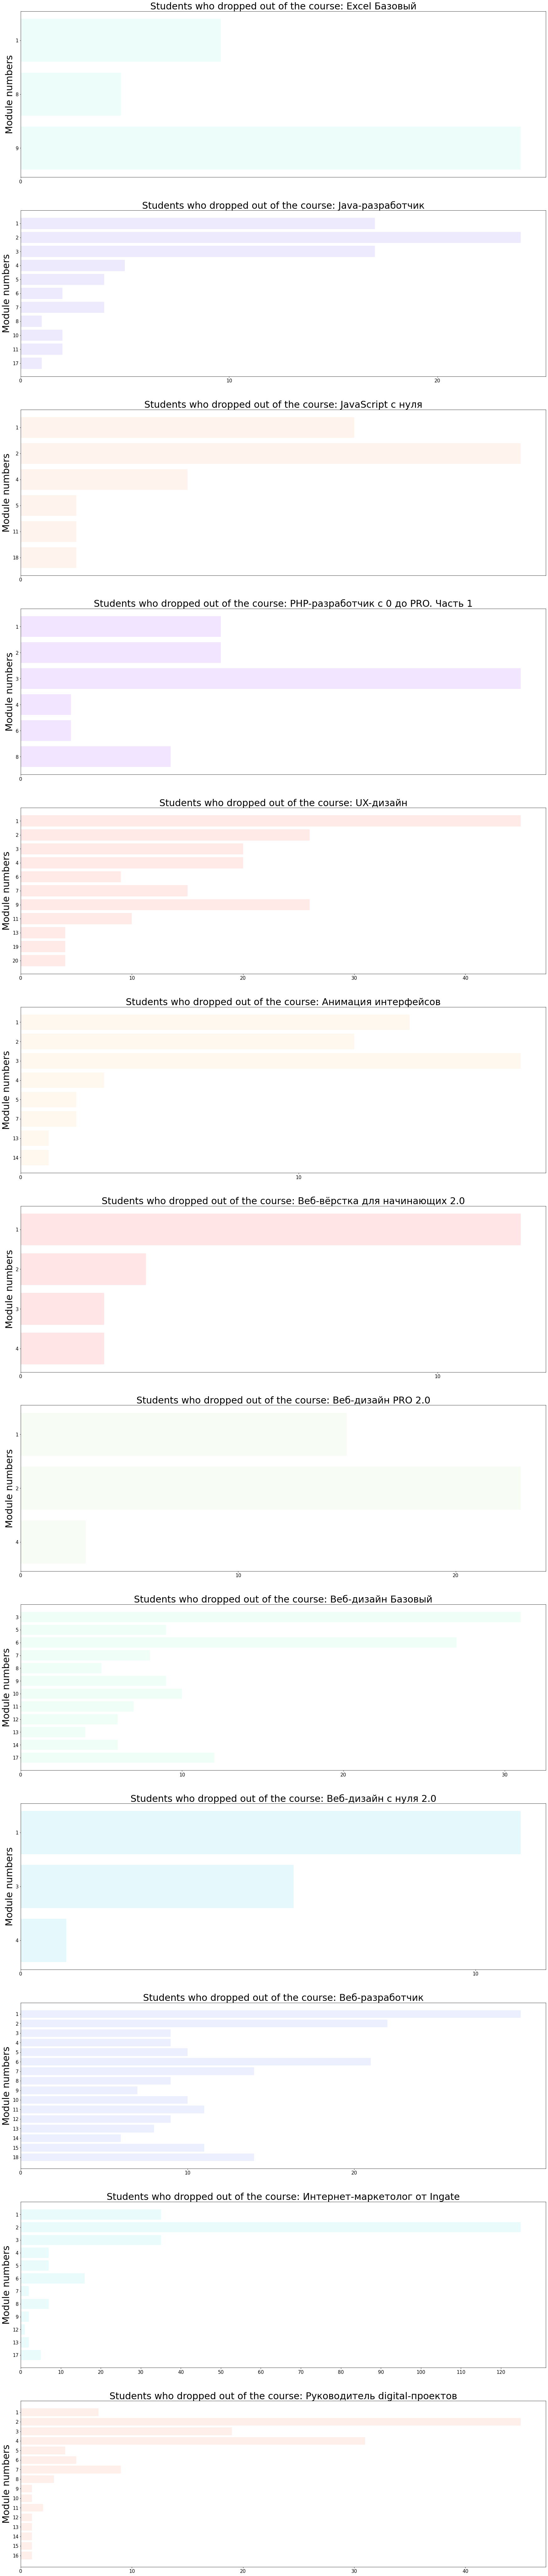

In [110]:
course_list_1 = academic_perfomance_2.unstack().index
fig, axes = plt.subplots(course_list_1.nunique(), 1, figsize=(30,150))
#Creating random colors
a = np.linspace(0,1,16)
np.random.shuffle(a)
colors = iter(matplotlib.cm.rainbow(a))
i = 0
for row in range(course_list_1.nunique()):
    #Making bar-chart
    axes[row].barh(list(range(
        academic_perfomance_2.loc[course_list_1[i]].index.nunique())),
                            academic_perfomance_2.loc[course_list_1[i]][::-1],
                            color = next(colors), label = course_list_1[i], alpha=0.1)
    #Making ticks
    axes[row].set_yticks(np.arange(len(academic_perfomance_2.loc[course_list_1[i]].index)))
    axes[row].set_yticklabels(academic_perfomance_2.loc[course_list_1[i]][::-1].index, fontsize = 15)
    axes[row].set_xticks(range(0, max(academic_perfomance_2.loc[course_list_1[i]]), 10))
    axes[row].set_xticklabels(range(0, max(academic_perfomance_2.loc[course_list_1[i]]), 10), fontsize = 15)
    #Making titles
    axes[row].set_title('Students who dropped out of the course: ' + course_list_1[i] , fontsize = 30)
    axes[row].set_ylabel('Module numbers', fontsize =30)
    i += 1
plt.show()

Список этих студентов

In [113]:
academic_perfomance_2 = data.loc[(data['status'] != 'done')\
                               & (data['start_date'] < dead_date)\
                               & (data['is_homework'] == True)]
academic_perfomance_2 = academic_perfomance_2.groupby(['course_title', 'module_number'])['student_id'].unique()
academic_perfomance_2

course_title       module_number
Excel Базовый      1                [28fb6ecb5d94b95ea28f4247e1d71424, bed2fcfbd96...
                   8                               [76aaaabc337e12dc06ffa43bdefe1036]
                   9                [a708bee4b22960eb8aee5555f43cfe26, f73ff6df8e4...
Java-разработчик   1                [2477b4dbaa03fdc4c0162e2398f87855, 5407dd6bce3...
                   2                [fb019632313c642191d5a072499ad647, 8a394c1b0d2...
                   3                [76aaaabc337e12dc06ffa43bdefe1036, b8d81306055...
                   4                [92a8ca9f50e2e63745cd3e406a5f259d, cc0d99623b5...
                   5                [aea184c1176260e413ccbf035affc626, cc0d99623b5...
                   6                [aea184c1176260e413ccbf035affc626, cc0d99623b5...
                   7                [aea184c1176260e413ccbf035affc626, 20165d40da3...
                   8                               [1ad26776b05f567d3838b3ded4954d3e]
                   10